## REQUERIMENTS BEFORE EXECUTING THIS NOTEBOOK

### Download the data first, if you don't...
You must download the following repository: https://github.com/tonilopezrosell/understandingsuicide
There you can find the Data, the notebooks and the README (with the instructions about the definition of the file structure that allows the correct functioning of the code and with the correct order of the execution of the notebooks).

### With the data downloaded...
You must execute 'Unemployment_Time_Series_Reading_and_Cleansing_Data' and 'Suicide_Time_Series_Reading_and_Cleansing_Data' (you can find both in the repository mentioned above) before running this one.

In [3]:
#If you want to run this code without 'warnings' you can run the following line:
options(warn=-1)

### Libraries needed...

In [4]:
#We are going to use 'str_c' function from stringr packages to join multiple strings into a single string and build our path
#install.packages('stringr',repos = 'http://cran.us.r-project.org')
library(stringr)

#If we want to create a date range we can use 'make_date' function from lubridate package
#install.packages('lubridate', repos = 'http://cran.us.r-project.org')
library(lubridate)

#Sometimes we can use 'ggplot2' package if we want to create graphs with certain characteristics. 
#This time we are going to need it to use 'autoplot' function
#install.packages('ggplot2', repos = 'http://cran.us.r-project.org', dependencies = TRUE)
library(ggplot2)

#install.packages('ggfortify', repos = 'http://cran.us.r-project.org')
#this library lets ggplot deal with ts objects
library(ggfortify)

#install.packages('forecast', repos = 'http://cran.us.r-project.org', dependencies = TRUE)
#forecast package has several methods for working with time series
#some dependencies may have to be installed manually (e.g., RcppArmadillo) with the 
#'conda install r-packagesname' or 'conda install -c conda-forge r-packagesname' commands
library(forecast)

# install.packages("TTR")
#when installing many libraries can happen that some of them show upload errors, you need to 
#restart the notebook and open the libraries again (once their are installed)
library(TTR)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



### The correct path...

Establish as a working directory the site where you have saved the folder 'Data'. 
Normally, the desired working directory will match the one you are with. But you can change it if you want and assign the path of that working directory to the variable 'working_directory'.

In [5]:
#In my case I don't need to change it
getwd()

[1] "C:/Users/Toni/Desktop/understandingsuicide-master/understandingsuicide-master"

In [6]:
#In my case
working_directory = getwd()

### In this notebook...

We will analyze the time series of suicide and unemployment in Spain from 1998 to 2017, we will make some forecasts and we will study the relationship that may exist between both series:


**Analysis of Suicide Time Series**
1. Reading the data
2. Creating and exploring the Time Series
3. Time Series Components Analysis
4. Forecasting with ARIMA

**Analysis of Unemployment Time Series**
1. Reading the data
2. Creating and exploring the Time Series
3. Time Series Components Analysis
4. Forecasting with ARIMA

**Relation between Unemployment and Suicide in Spain**
1. Prewhitening method and Cross Correlation

# Analysis of Suicide Time Series

## 1. Reading the Data

In [7]:
wkdir_and_path_suicide <- cbind(working_directory,'Data/Monthly_suicide_Spain_1998-2017.csv') 
# in our system, forward slashes work, but maybe you have to change them
suicide_filepath <- str_c(wkdir_and_path_suicide, collapse = "/")
suicide_1998_2017 <- read.csv(suicide_filepath)
suicide_1998_2017

Date,N_of_suicides
<fct>,<dbl>
1998-01-31,218
1998-02-28,238
1998-03-31,281
1998-04-30,195
1998-05-31,267
1998-06-30,222
1998-07-31,226
1998-08-31,207
1998-09-30,193


Seems that our date index is not very useful in R code. We need a 'ts' object to use many of the best R resources for time series. The function 'ts' automatically turns our list of values into a time series if you give it start date and frequency.

## 2. Creating and exploring the Time Series

In [8]:
suicide_1998_2017 <- ts (suicide_1998_2017$N_of_suicides, frequency = 12, start = c(1998,1))
class(suicide_1998_2017)

[1] "ts"

In [9]:
#Here we have the start of our time series
start(suicide_1998_2017)

[1] 1998    1

In [10]:
#And the end
end(suicide_1998_2017)

[1] 2017   12

In [11]:
#The cycle of this time series is 12months in a year
frequency(suicide_1998_2017)

[1] 12

In [12]:
cycle(suicide_1998_2017)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1998,1,2,3,4,5,6,7,8,9,10,11,12
1999,1,2,3,4,5,6,7,8,9,10,11,12
2000,1,2,3,4,5,6,7,8,9,10,11,12
2001,1,2,3,4,5,6,7,8,9,10,11,12
2002,1,2,3,4,5,6,7,8,9,10,11,12
2003,1,2,3,4,5,6,7,8,9,10,11,12
2004,1,2,3,4,5,6,7,8,9,10,11,12
2005,1,2,3,4,5,6,7,8,9,10,11,12
2006,1,2,3,4,5,6,7,8,9,10,11,12
2007,1,2,3,4,5,6,7,8,9,10,11,12


In [13]:
#Some descriptive statistics
summary(suicide_1998_2017)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  135.0   213.5   267.5   257.7   301.0   371.0 

The first basic plot that we are going to use is a line graph with the values of the series in the ordinate and the temporal instants on the abscissa axis. Constructing this graph can be very useful to observe some characteristics of our time series.

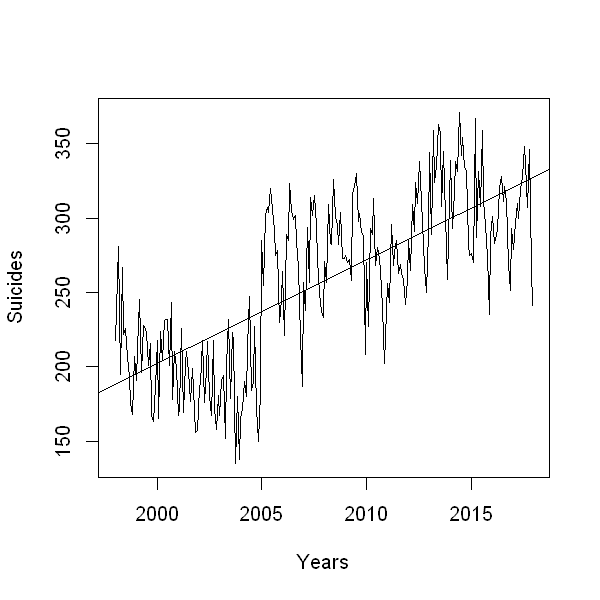

In [14]:
options(repr.plot.width=5, repr.plot.height=5)

#The number of suicides in Spain
plot(suicide_1998_2017, xlab = 'Years', ylab = 'Suicides')

#this will fit in a line
abline(reg=lm(suicide_1998_2017~time(suicide_1998_2017)))

Based on what we see in the representation, it seems that the mean, the variance and the covariance are not constant over time, there is a increasing trend. This makes us think that we are facing a **non-stationary series**, although this is something that we will analyze in more detail later.

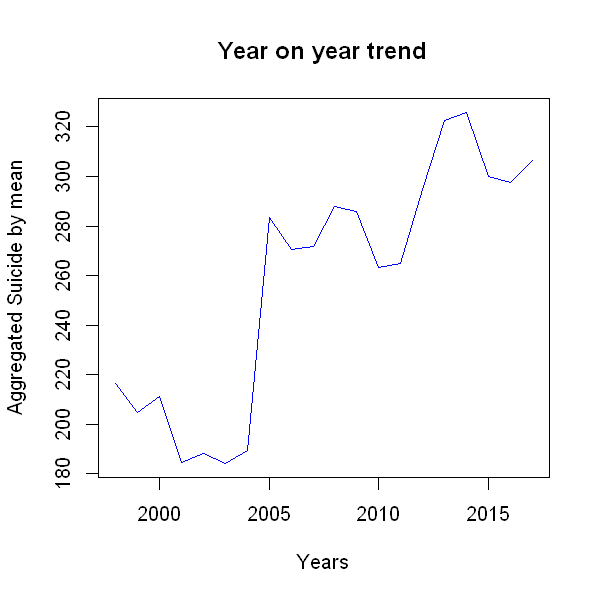

In [15]:
#In this plot we are going to aggregate the cycles and display a year on year trend
options(repr.plot.width=5, repr.plot.height=5)
plot(aggregate(suicide_1998_2017,FUN=mean), xlab = "Years", ylab = "Aggregated Suicide by mean", main = 'Year on year trend', col = 'blue')

The year on year trend clearly shows that the **number of suicides have been increasing since 2003-2004.**

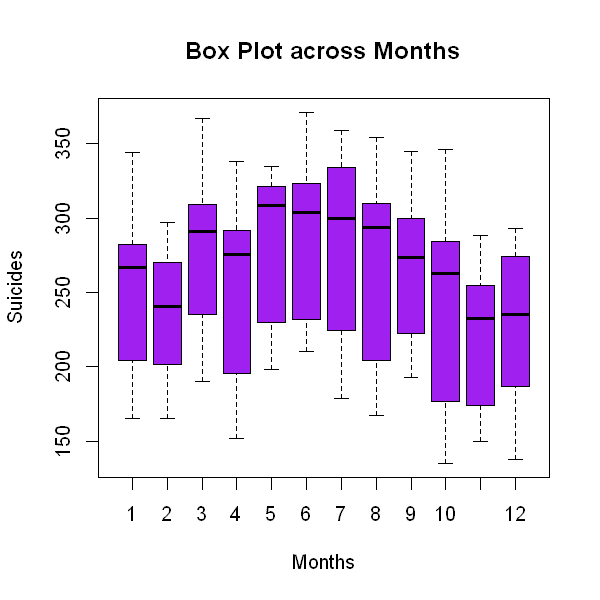

In [16]:
#Box plot across months will give us a sense on seasonal effect
options(repr.plot.width=5, repr.plot.height=5)
boxplot(suicide_1998_2017~cycle(suicide_1998_2017), xlab = 'Months', ylab = 'Suicides', main = 'Box Plot across Months',col = 'purple')

The mean value of suicides in **May, June and July is higher than rest of the months**.

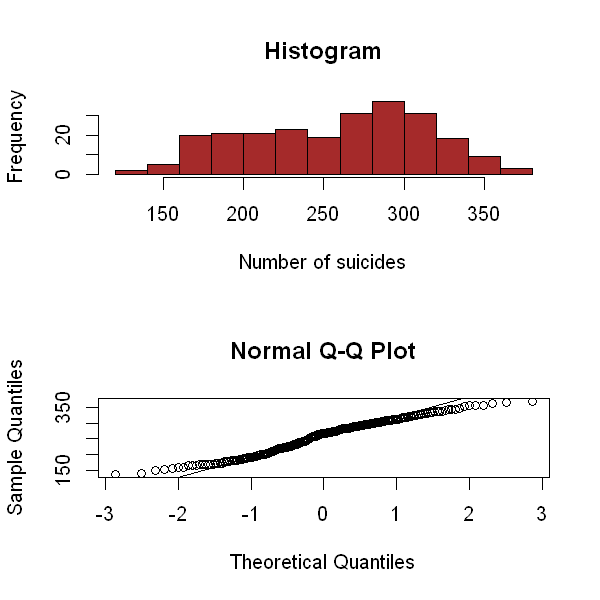

In [17]:
options(repr.plot.width=5, repr.plot.height=5)

date = make_date(year = 1998, month = 1)
Date_range = seq(from = date, by = 'month', length.out = length(suicide_1998_2017))

par(mfrow=c(2,1)) 

#histogram
hist (suicide_1998_2017, xlab = 'Number of suicides', main = 'Histogram', col = 'brown')

#Q-Q plot
qqnorm(suicide_1998_2017)
qqline(suicide_1998_2017)

In [115]:
ks.test(suicide_1998_2017, "pnorm", 257.725, 55.3225)


	One-sample Kolmogorov-Smirnov test

data:  suicide_1998_2017
D = 0.083239, p-value = 0.07189
alternative hypothesis: two-sided


The graphs and the Kolmogorov-Smirnov test show us that our series is close to a normal distribution.

## 3. Time Series Components Analysis

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

Also the decomposition methods can help us in forecasting.

*Let's start to analyze each of its components with a little more detail, but first we are going to split our time series in a train and a test sets.*

In [19]:
suicide_series_test  <- ts(tail(suicide_1998_2017,48), frequency = 12, start = c(2014,1)) # ts conversion
suicide_series_train  <- ts(head(suicide_1998_2017, 192), frequency = 12, start = c(1998,1)) # ts conversion

### 3.1. Decomposition methods

#### 3.1.1. Moving Mean

We present the methodology of moving averages because it's the first step in the classical decomposition and allows us to observe **the trend** of our time series represented in a smoothed way. It can be a good method to extract information in time series where there are no fluctuations due to trend or seasonality.

It is possible to apply a moving mean to a moving mean. One reason for doing this is to make an even-order moving average symmetric. It's recommended to use a 2x12 Moving averages to estimate the trend-cycle of monthly data:

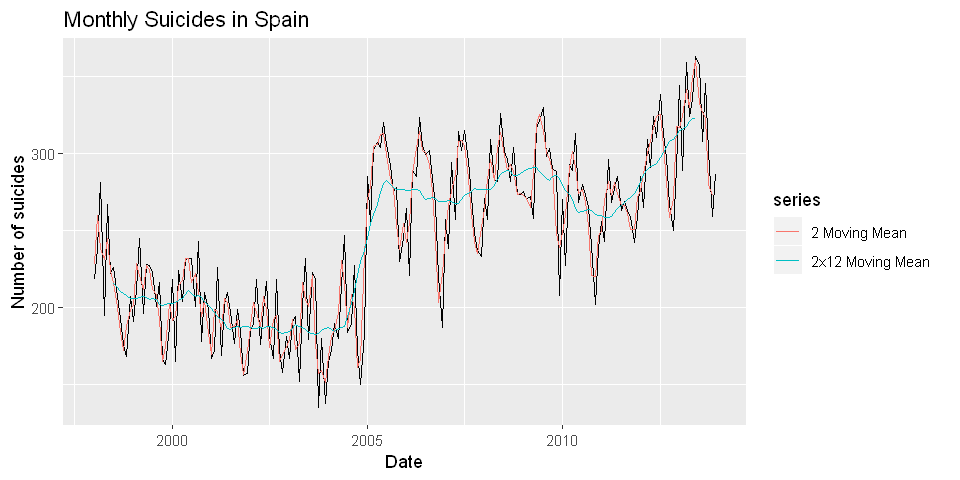

In [20]:
options(repr.plot.width=8, repr.plot.height=4)

#Applying Moving Mean
autoplot(suicide_series_train) + 
    autolayer(ma(suicide_series_train, order=2, centre=FALSE), series='2 Moving Mean')+
    autolayer(ma(suicide_series_train,12, centre = TRUE), series='2x12 Moving Mean') +
    xlab('Date') + ylab('Number of suicides') +
    ggtitle('Monthly Suicides in Spain') +
    guides(colour=guide_legend(title='series'))

The moving mean helps us to reduce the noise or short-term volatility in the movements of the data and in this way allows us to better evaluate the quality and direction of a trend.

We can see that the estimated trend component shows an **increase from approximately 200 or less in 2004 to approximately 300 at the end of 2005, followed by a more or less constant increase from then until 2017.**

Seasonal adjustments are a statistical procedure to eliminate seasonal effects or what is the same, eliminate the influence of seasonal patterns in the data. These seasonal effects induce changes or variations due to the seasonality, causing a distortion of their true movement. 

There are many methods to struggle with seasonality. But first we have to be sure that there is seasonality in our time series.

#### 3.1.2. Classic Decomposition

We are going to use decompose function to see the components of our time series in a classic decomposition method, just to have a first look:

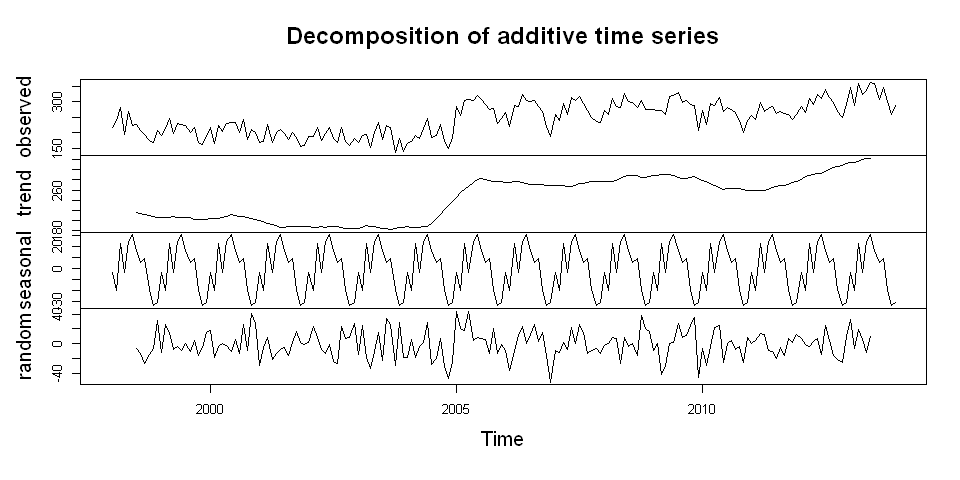

In [21]:
suicide_series_components  <- decompose(suicide_series_train)
plot(suicide_series_components)

The plot above shows the original time series (top), the estimated trend component (second from top), the estimated seasonal component (third from top), and the estimated irregular component (bottom). 

If we take a look at the suicide time series it seems that we have to deal with a trend and a seasonal component. Let's confirm this by plotting the autocorrelation function of our time series:

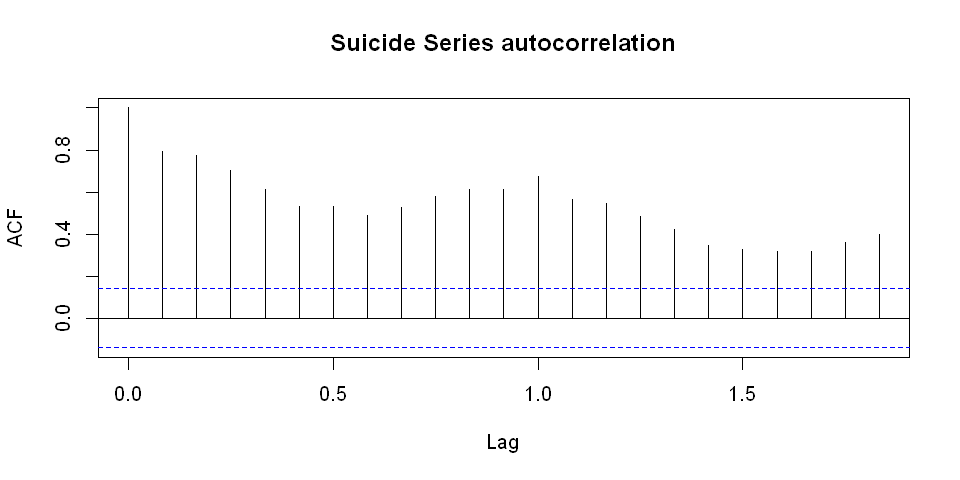

In [22]:
acf(suicide_series_train, main = 'Suicide Series autocorrelation')

The slow decrease in the ACF as the lags increase is due to the trend, while the “scalloped” shape is due the seasonality. **We have a seasonal component**.

Classical decomposition methods assume that the seasonal component repeats from year to year and we think that it might not be our case. A more sophisticated implementation is stl decomposition.

#### 3.1.3. STL decomposition

Maybe the most robust, versatile and popular method according to many sources. 
To determine the trend component this method uses a type of smoothing called loess that
makes a linear regression in a small dot window to decompose a time series into seasonal, trend and irregular components.

We are going to use mstl function which provides a convenient automated stl.

In [23]:
STL_suicide_components <- mstl(suicide_series_train) 

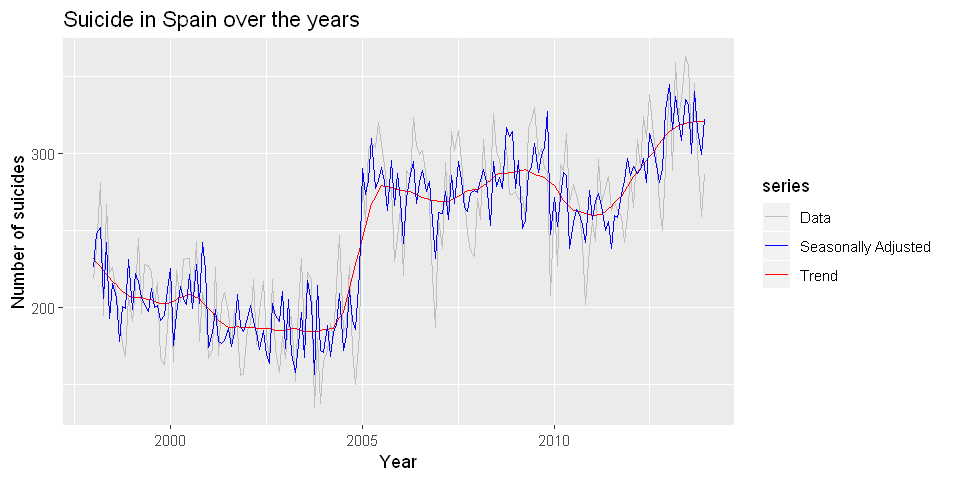

In [24]:
options(repr.plot.width=8, repr.plot.height=4)
autoplot(suicide_series_train, series="Data") +
    autolayer(trendcycle(STL_suicide_components), series="Trend") +
    autolayer(seasadj(STL_suicide_components), series="Seasonally Adjusted") +
    xlab("Year") + ylab("Number of suicides") +
    ggtitle("Suicide in Spain over the years") +
    scale_colour_manual(values=c("gray","blue","red"),
             breaks=c("Data","Seasonally Adjusted","Trend"))

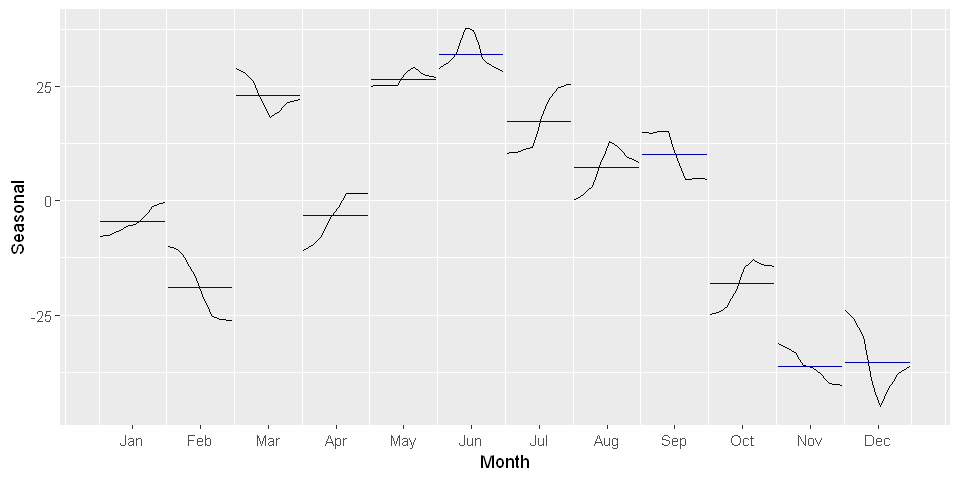

In [25]:
options(repr.plot.width=8, repr.plot.height=4)
STL_suicide_components %>% seasonal() %>% ggsubseriesplot() + ylab("Seasonal")

This form of plot enables the underlying seasonal pattern to be seen clearly, and also shows the changes in seasonality over time.  
- February, March, September and December have a decreasing seasonality that begins to increase in recent years. 
- November has a drecreasing seasonality. 
- January and July ave a increasing seasonality. 
- April, August and October have a increasing seasonality that begins to decrease or stabilize in recent years

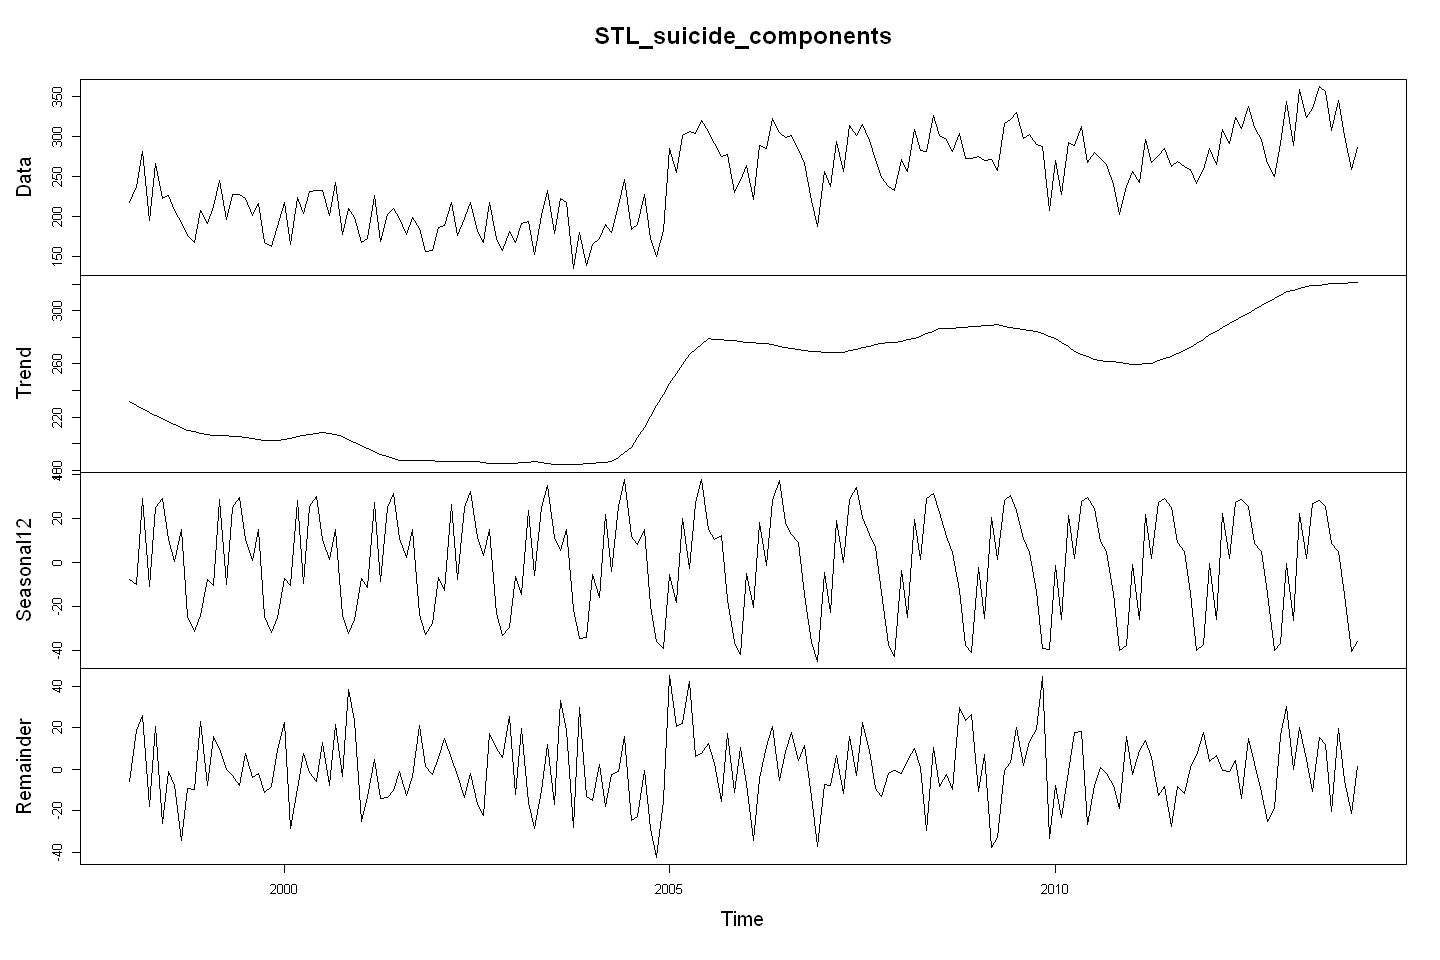

In [26]:
options(repr.plot.width=12, repr.plot.height=8)

plot(STL_suicide_components)

Here we can see a more smothed trend. But the most interesting thing that we can observe is how the seasonal component varies with time. Let's take a look at the values:

In [27]:
seasonal(STL_suicide_components) #get the values of the seasonal component

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1998,-7.88926475,-9.94426966,28.82186869,-10.79972087,25.01057681,28.91284501,10.37245273,0.25376826,14.85832935,-24.83617765,-31.23114429,-23.94461255
1999,-7.69584823,-10.29689734,28.36713239,-10.28173861,25.09598386,29.50481451,10.46035502,0.79336162,14.81430769,-24.58254082,-31.68034360,-24.97149539
2000,-7.49621885,-10.64111991,27.92299344,-9.75149649,25.19531327,30.11081747,10.56240187,1.34386216,14.77795583,-24.32689931,-32.13320334,-26.00938288
2001,-7.12982690,-11.59745636,27.00517152,-8.80385537,25.13139185,31.12235177,10.83629569,2.17864151,14.95091097,-23.70424804,-32.60618600,-27.75799183
2002,-6.79321736,-12.57380165,26.07711433,-7.85919664,25.07174093,32.13879043,11.11572772,3.01080353,15.11309324,-23.10521764,-33.11563752,-29.55607940
2003,-6.27595347,-14.41642725,23.78404966,-5.99746784,25.06018513,34.87498901,11.31607482,5.52097863,15.08332031,-21.38645131,-34.62005813,-34.27225229
2004,-5.68876114,-16.17620274,21.58675673,-4.03630604,25.15172358,37.71099726,11.61294702,8.11763053,15.12997587,-19.60688615,-36.07930954,-38.96145403
2005,-5.38602293,-18.33243833,19.91200246,-2.63768074,26.67688077,37.55204740,14.91641323,10.52675105,12.05578412,-17.07082650,-36.31186421,-42.00861410
2006,-5.25433580,-20.65707077,18.07150554,-1.39279550,28.06030050,37.27471092,18.12484364,12.87776352,8.96041204,-14.51159995,-36.47690474,-44.94359425
2007,-4.49294045,-22.90335318,18.82189019,0.07476307,28.56957715,34.23364723,20.43414833,12.46720248,6.89674475,-13.60402853,-37.13232244,-42.88889527


June and May are the months with the highest values of suicides, followed by July that does not stop growing. November remains with the lowest values over time.

The seasonal component might not be relevant to explain the dynamics of the series. In order to see that, we can compare the variance of each component with respect to the variance of the original series.

In [28]:
apply(STL_suicide_components,2, var) / var(suicide_series_train)

Data      Trend Seasonal12  Remainder 
 1.0000000  0.6898974  0.1861296  0.1022629

*We can see that it is the trend what explains most of the variance in the data.*

In [29]:
seasadj(STL_suicide_components)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1998,225.8893,247.9443,252.1781,205.7997,241.9894,193.0872,215.6275,206.7462,178.1417,200.8362,199.2311,230.9446
1999,198.6958,222.2969,216.6329,206.2817,202.9040,197.4952,212.5396,200.2066,201.1857,191.5825,194.6803,211.9715
2000,225.4962,175.6411,196.0770,213.7515,205.8047,201.8892,221.4376,199.6561,228.2220,202.3269,242.1332,225.0094
2001,174.1298,183.5975,198.9948,177.8039,176.8686,178.8776,186.1637,174.8214,184.0491,208.7042,188.6062,184.7580
2002,192.7932,201.5738,191.9229,183.8592,172.9283,184.8612,169.8843,163.9892,202.8869,195.1052,191.1156,210.5561
2003,173.2760,205.4164,170.2160,157.9975,175.9398,197.1250,167.6839,217.4790,202.9167,156.3865,214.6201,172.2723
2004,170.6888,188.1762,168.4132,184.0363,188.8483,209.2890,172.3871,181.8824,211.8700,191.6069,186.0793,221.9615
2005,290.3860,273.3324,282.0880,309.6377,277.3231,282.4480,291.0836,281.4732,262.9442,295.0708,266.3119,287.0086
2006,269.2543,241.6571,270.9285,286.3928,294.9397,267.7253,280.8752,289.1222,275.0396,281.5116,256.4769,231.9436
2007,261.4929,260.9034,275.1781,256.9252,285.4304,267.7664,294.5659,282.5328,265.1033,262.6040,274.1323,275.8889


Seasadj function returns seasonally adjusted data constructed by removing the seasonal component. The seasonally adjusted time series now just contains the trend and the irregular component.

##### *Forecasting with Decomposition*

While decomposition is primarily useful for studying time series data, and exploring historical changes over time, it can also be used in forecasting.

We will use stlf function which decompose the time series using STL, forecast the seasonally adjusted series with ARIMA, and return the reseasonalised forecasts.

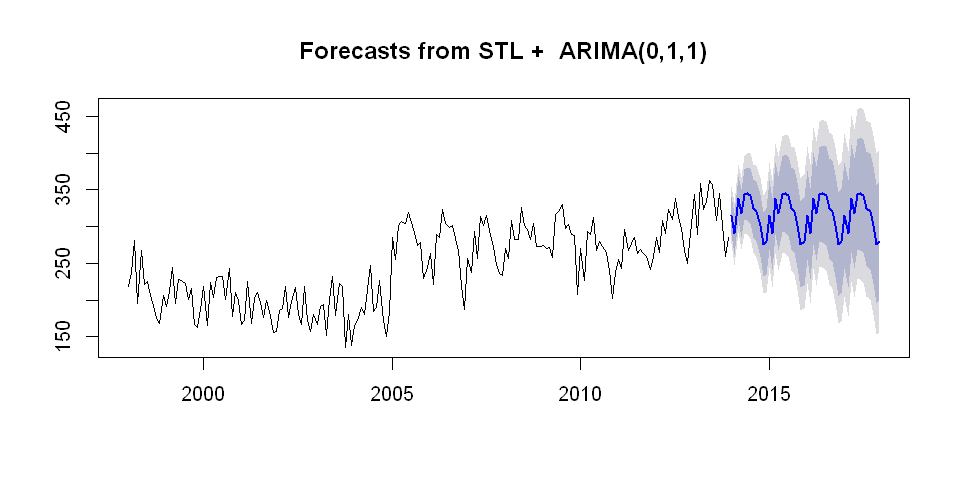

In [30]:
options(repr.plot.width=8, repr.plot.height=4)

forecast_decomposed_suicide_series <- stlf(suicide_series_train, method='arima', h = 48)
plot(forecast_decomposed_suicide_series)

We can investigate whether the predictive model can be improved upon by checking whether the in-sample forecast
errors show non-zero autocorrelations at lags 1-12, by making a correlogram and carrying out the Ljung-Box test.

What is desired in time series is to build a model such that after extracting the trend and seasonality it can be certain that the waste is very similar to a white Gaussian noise. This assures us that we obtained all possible information from the data and that we can no longer know much more about the series in the errors. This also allows us to trust that the model is good and that its predictions therefore must be good.

In [31]:
check_model_residuals  <- function(model){
    options(repr.plot.width=7, repr.plot.height=7)

    #Ljung-Box test
    model_residuals  <- residuals(model)
    print(Box.test(model_residuals, lag= 24, type = 'Ljung-Box'))

    #Graphic analysis
    par (mfrow = c(2,2))
    plot (model_residuals, ylab = 'Residuals')
    abline (h=0, lty=2, col="2")
    ##Correlogram
    acf (model_residuals, 24, na.action = na.pass, main = 'Residuals Series', ylab = 'ACF' )
    ##Histogram
    hist(model_residuals, prob = T, col="6", main = 'Histogram of residuals', xlab = 'Residuals')
    lines(density (na.omit(model_residuals)), col="4")
    ##Q-Q plot
    qqnorm (model_residuals)
    qqline (model_residuals,col="2")}


	Box-Ljung test

data:  model_residuals
X-squared = 35.437, df = 24, p-value = 0.06218



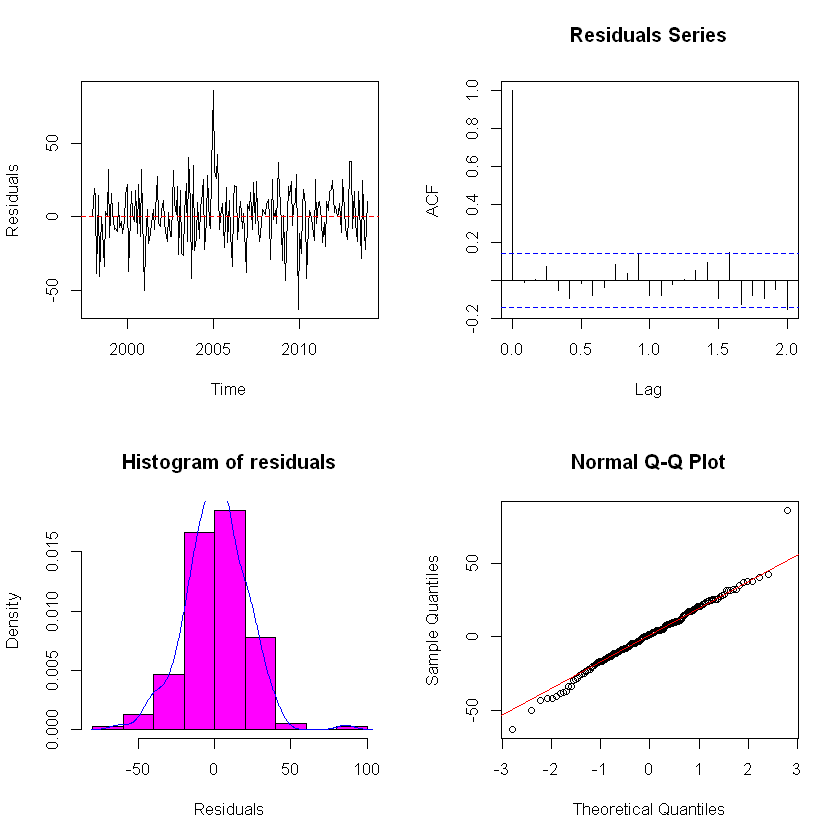

In [32]:
check_model_residuals(forecast_decomposed_suicide_series)

The graphs and the test show us that the model is relatively good since their residuals behave like white noise with non significant autocorrelations and a normal distribution.

##### *- Evaluating the forecasts.* 
Here we are going to see the accuracy of the model. Later we will evaluate the metrics of the models generated to compare them

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.024471,19.89423,15.27388,-0.2002356,6.621737,0.5675677,-0.01144965,NA
Test set,-8.864959,24.00003,20.82885,-3.4205697,6.943263,0.7739871,0.05833164,0.7228049


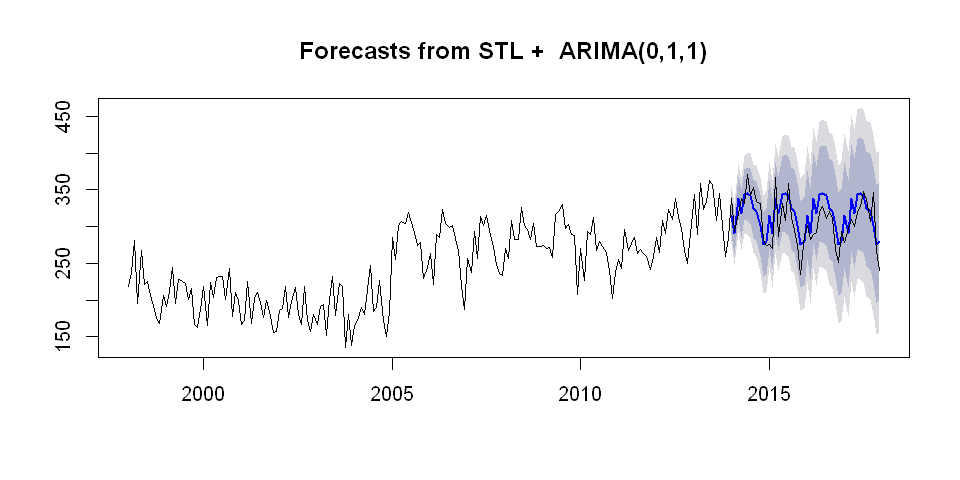

In [33]:
options(repr.plot.width=8, repr.plot.height=4)

#Accuracy and plot
accuracy(forecast_decomposed_suicide_series, suicide_series_test)
plot(forecast_decomposed_suicide_series)
lines(suicide_1998_2017)

##### Forecasting with Holt-Winters Exponential Smoothing

If you have a time series that can be described using an additive model with increasing or decreasing trend and
seasonality, you can use Holt-Winters exponential smoothing to make short-term forecasts.

In [34]:
suicide_series_hw_forecasts  <- HoltWinters(suicide_series_train)
suicide_series_hw_forecasts

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = suicide_series_train)

Smoothing parameters:
 alpha: 0.4094368
 beta : 0.006114559
 gamma: 0.3334522

Coefficients:
           [,1]
a   309.1665554
b     0.1756057
s1    5.7093781
s2  -22.1624680
s3   30.8767563
s4    7.2282819
s5   31.5845167
s6   36.7446667
s7   33.2842689
s8   10.7927082
s9   13.5906965
s10 -12.9284466
s11 -38.0492814
s12 -24.9869868

The estimated values of alpha, beta and gamma are 0.40, 0.00, and 0.33, respectively. The value of alpha is relatively low, indicating that the estimate of the level at the current time point is based upon both recent observations and some observations in the more distant past. The value of beta is 0.00, indicating that the estimate of the slope b of the trend component is not updated over the time series, and instead is set equal to its initial value.
This makes good intuitive sense, as the level changes quite a bit over the time series, but the slope b of the trend
component remains roughly the same. The value of gamma (0.33) is low, indicating that the seasonal component don't change to much over time.


The observed values are plotted with the black line and the fitted values with the red one.

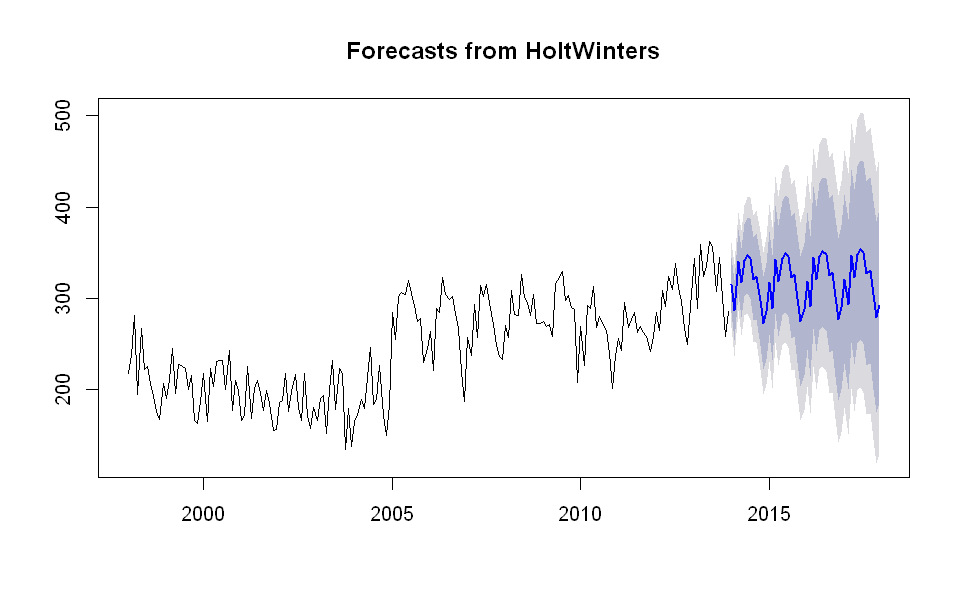

In [35]:
options(repr.plot.width=8, repr.plot.height=5)


suicide_series_hw_future_forecasts <- forecast(suicide_series_hw_forecasts, h = 48)
plot(suicide_series_hw_future_forecasts)

*The forecasts are shown as a blue line, and the blue and grey shaded areas show 80% and 95% prediction
intervals, respectively.*

Now we are going to see how the residuals behave as we did with the previous model.


	Box-Ljung test

data:  model_residuals
X-squared = 36.558, df = 24, p-value = 0.04841



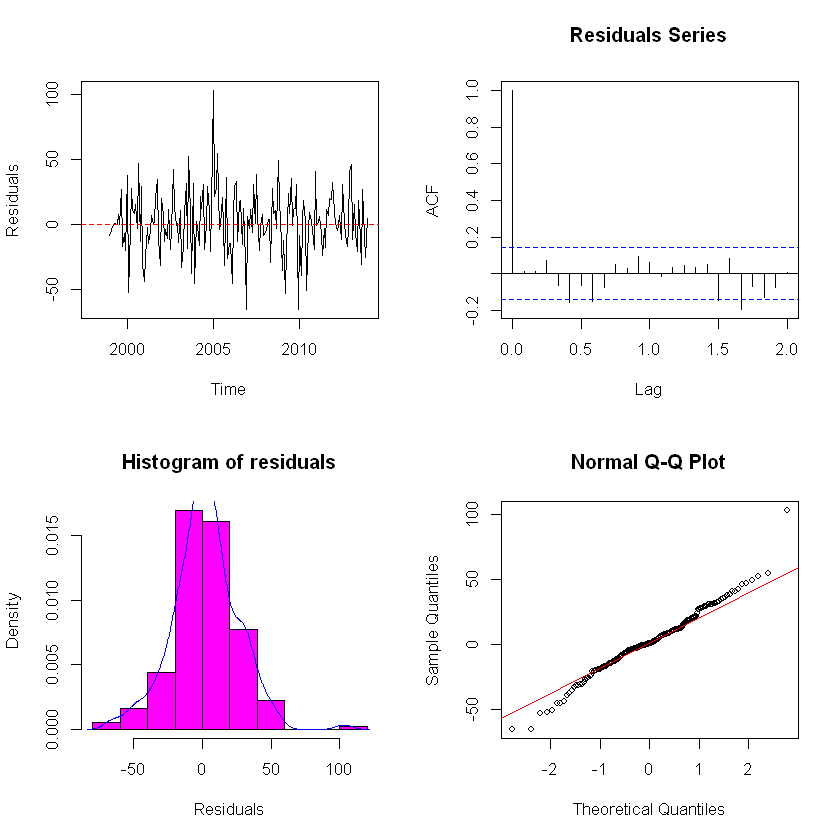

In [36]:
check_model_residuals(suicide_series_hw_future_forecasts)

The Ljung-Box test shows that we can reject the null hypothesis assuming a 5% chance of making a mistake. So we can assume that our values are showing dependence on each other at lag 24.

Checking the graphical analysis and the hypothesis test, **it is concluded that the residuals of the model are lightly autocorrelated .** Therefore, it can be considered that the predictions obtained from the model won't be very generalizable.

- Evaluating the forecasts

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.022322,23.76371,17.61132,0.0889481,7.552774,0.6544255,0.01031651,NA
Test set,-11.942568,26.37736,22.57345,-4.4423405,7.551316,0.8388151,0.09975748,0.7933364


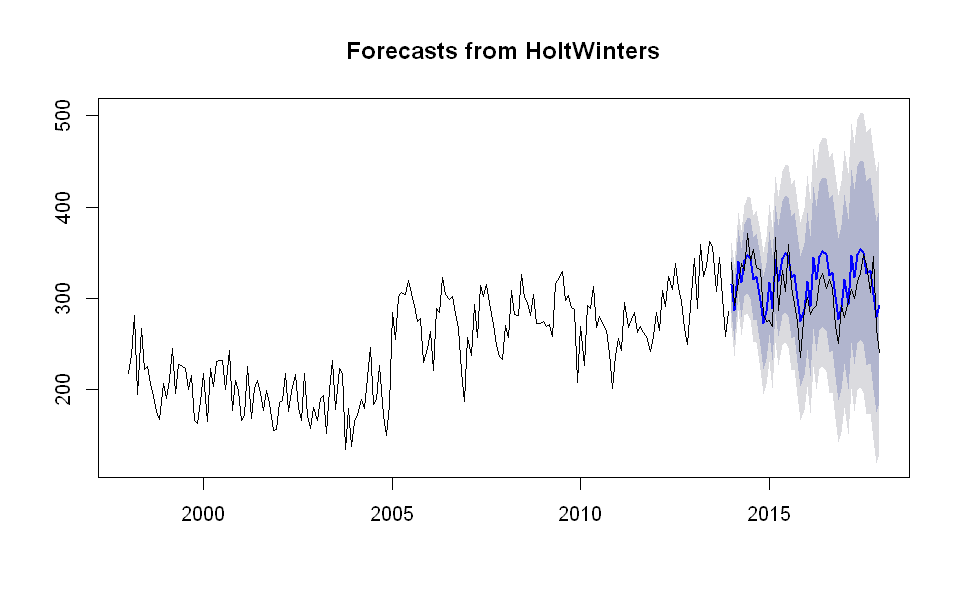

In [37]:
options(repr.plot.width=8, repr.plot.height=5)

#Accuracy and plot
accuracy(suicide_series_hw_future_forecasts, suicide_series_test)
plot(suicide_series_hw_future_forecasts)
#lines(suicide_1998_2017)
lines(suicide_series_test)

If we want to apply other models like Arima we have to have in mind that most of the time series models work on the assumption that the time series is stationary.  Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

### 3.2. Stationarity Testing

We can assume the series to be stationary if it has these following statistical properties over time:

- Constant mean
- Constant variance
- An autocovariance that does not depend on time.

To test these conditions we will use the following methods:
- In the first one we'll see how their 'moving' statistics behave.
- In the second one we are going to observe the summary statistics.
- And in the last one we're going to use statistical tests.

#### 3.2.1. Moving statistics

We can plot the moving average and see if it varies with time, this is a smoothing method. By moving average We mean that at any instant ‘t’, we’ll take the average of the last year (in our case). We are going to plot it against the original time series and take a look at it.

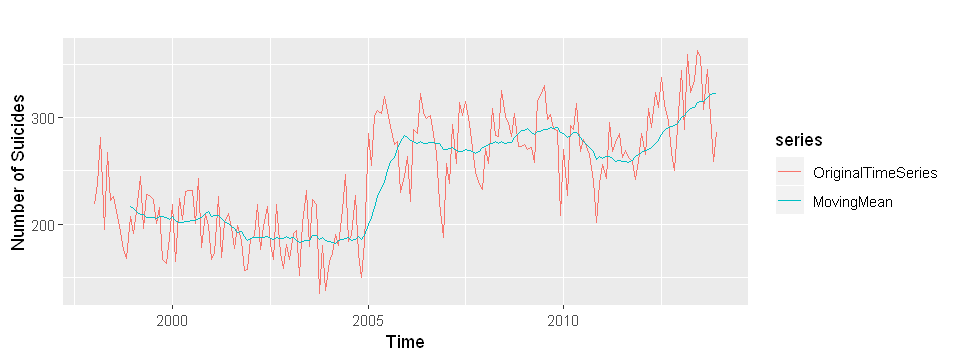

In [38]:
moving_mean_vs_OG <- function (OriginalTimeSeries, ylabel){
    MovingMean  <- SMA (OriginalTimeSeries, 12)
    Moving_mean_vs_OG  <- cbind(OriginalTimeSeries, MovingMean)
    options(repr.plot.width=8, repr.plot.height=3)
    autoplot(Moving_mean_vs_OG, ylab = ylabel)}

moving_mean_vs_OG(suicide_series_train, 'Number of Suicides')



The data smoothed with a simple moving average of order 12 gives a clearer picture of the trend component, and
we can see that **the number of suicides in Spain seems to have increased from about less than 200 cases to about almost 300
cases during 2005, and and since then the number of suicides has not diminished much, in fact, it has grown to exceed 300 in 2013.**


The mean is clearly non constant over time. It seems that the series is **non stationary** but we are going to keep checking.

#### 3.2.2. Summary Statistics

We are going to split suicide time series into two partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [39]:
Stationarity_descriptive_test <- function (timeseries){
    split  <-  length(timeseries) / 2
    X1 <-  timeseries[0:split]
    X2  <- timeseries[split: length(timeseries)]
    print (paste('Mean of the first partition =', mean(X1)))
    print (paste('Mean of the second partition =', mean(X2)))
    print (paste('Variance of the first partition =', var(X1)))
    print (paste('Variance of the second partition =', var(X2)))}

Stationarity_descriptive_test (suicide_series_train)

[1] "Mean of the first partition = 207.833333333333"
[1] "Mean of the second partition = 282.340206185567"
[1] "Variance of the first partition = 1626.47719298246"
[1] "Variance of the second partition = 1170.24763745704"


Running the code above, we can see the mean and variance look very different over time. It seems that we have a **non-stationary** time series.

#### 3.2.3. Statistical Tests

The ADF test has an alternate hypothesis of linear or difference stationary, while the KPSS test identifies trend-stationarity in a series.

ADF:
- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

KPSS

In [40]:
#package 'tseries' contains functions to test the stationarity of a time series 
#install.packages("tseries")
library(tseries)

In [41]:
Stationarity_statistical_tests <- function(timeseries){
    print(adf.test (timeseries))
    print(kpss.test (timeseries))}
    
Stationarity_statistical_tests(suicide_series_train)


	Augmented Dickey-Fuller Test

data:  timeseries
Dickey-Fuller = -4.4033, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


	KPSS Test for Level Stationarity

data:  timeseries
KPSS Level = 2.558, Truncation lag parameter = 4, p-value = 0.01



In the Dickey Fuller test the p-value is lower than 0.05 so we don't have enough statistical evidence to reject that our time sseries it's stationary.

However, in the Kpss test the p-value is lower than 0.05 so the null hypothesis of stationarity is rejected (5% error).

We aren't very sure about the stationarity of our series although it seems a non stationary one.

## 4. Forecasting with ARIMA

ARIMA stands for AutoRegressive Integrated Moving Average. Automatic Regression (AR) is the term that refers to the delays of the differentiated series, Moving Average (MA) refers to the delays of the errors and the integration (I) is the number of differences used to make the series of times is stationary.

As we said before, there are some necessary conditions for the ARIMA Model:

- The data must be stationary, this means that the properties of the series do not depend on the moment in which they are captured. A series of white noise and series with cyclic behavior can also be considered as stationary series.

- The data must be univariate, ARIMA works in a single variable. Automatic regression has to do with the regression of past values.


The first thing we are going to do is eliminate the non-stationary part of our series. To facilitate the analysis here, we will also eliminate the seasonal part of the data. The seasonal part can be removed from the analysis and added later, or it can be treated in the ARIMA model itself.

### 4.1.  Conversion to Stationary

This consists of modeling or estimating the trend and seasonality in the series and eliminating them from the series to obtain a stationary series. Then statistical forecasting techniques can be implemented in this series.

#### 4.1.1.  Smoothing

First of all, we are going to reduce trend by applying Box Cox transformation.

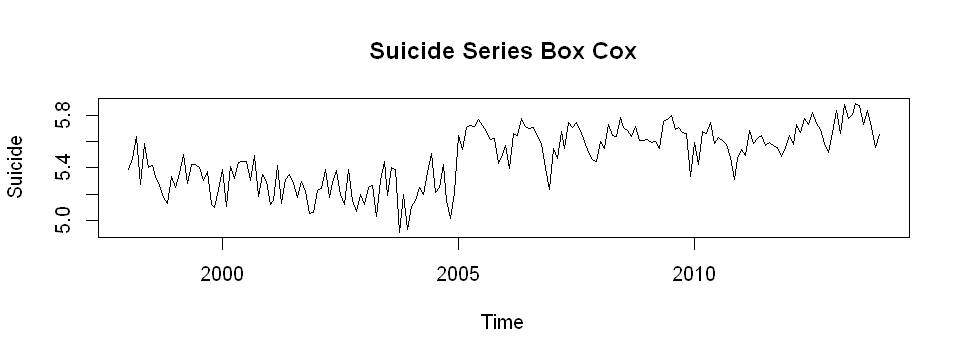

In [42]:
suicide_series_BoxCox <- forecast::BoxCox(suicide_series_train, lambda = 0)

options(repr.plot.width=8, repr.plot.height=3)
plot(suicide_series_BoxCox, ylab = 'Suicide', main = 'Suicide Series Box Cox')

#### 4.1.2. Differencing
Transformations such as logarithms or Box Cox can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

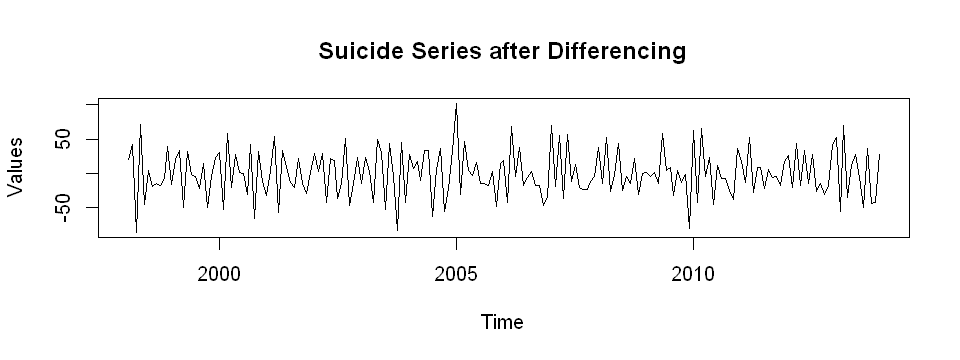

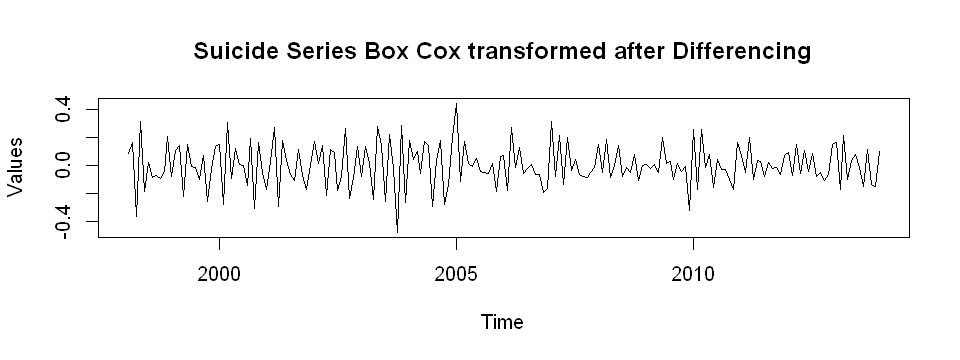

In [43]:
suicide_series_diff <- diff(suicide_series_train)
suicide_series_diff_BoxCox <- diff(suicide_series_BoxCox)

options(repr.plot.width=8, repr.plot.height=3)
plot(suicide_series_diff, ylab = 'Values', main = 'Suicide Series after Differencing')
plot(suicide_series_diff_BoxCox, ylab = 'Values', main = 'Suicide Series Box Cox transformed after Differencing')

The Box Cox transformed series looks better to me, we are going to choose it to keep working with.

Now we are going to test the resulting series **after the transformation.**
We are going to use the sationarity tests that we did before.

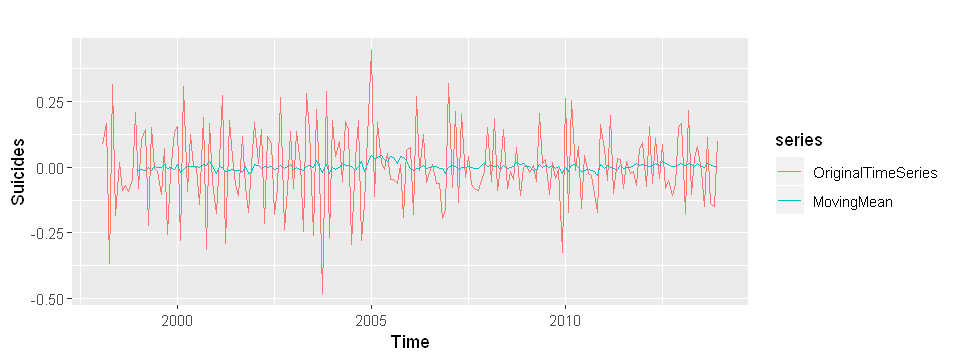

In [44]:
#Visual test with moving mean
moving_mean_vs_OG(suicide_series_diff_BoxCox, 'Suicides')

The mean keeps constant over time. Seems that now we have a stationary series.

In [45]:
#Numerical test contrasting mean and variance at different time points
Stationarity_descriptive_test(suicide_series_diff_BoxCox)

[1] "Mean of the first partition = 0.00122908576584883"
[1] "Mean of the second partition = 0.00123696617475356"
[1] "Variance of the first partition = 0.0308838033766116"
[1] "Variance of the second partition = 0.0143837443879929"


Both mean and variance don't change almost anything over time.

In [46]:
#KPSS and ADF hypothesis tests for stationarity
Stationarity_statistical_tests(suicide_series_diff_BoxCox)


	Augmented Dickey-Fuller Test

data:  timeseries
Dickey-Fuller = -7.767, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


	KPSS Test for Level Stationarity

data:  timeseries
KPSS Level = 0.019277, Truncation lag parameter = 4, p-value = 0.1



Our new time series passed the tests with 1 difference. We have a **stationary time series**

Also we can use 'ndiffs' function to see the number of differences required for our time series to pass the stationarity statistical tests. We are going to check this out for the 'kpss', 'adf' and 'pp' tests.

In [47]:
ndiffs(suicide_series_train, test= 'kpss')

[1] 1

In [48]:
ndiffs(suicide_series_train, test= 'adf')

[1] 1

In [49]:
ndiffs(suicide_series_train, test='pp')

[1] 0

##### *We can assume that our time series needs a differentiation of order 1 to become stationary*

We have converted the data into stationary but we have seen that there is a seasonal component in our time series.

We are going to take a look at the seasonal component to see if one order differencing is enough to get rid of it:

In [50]:
STL_suicide_diff_BoxCox_components <- mstl(suicide_series_diff_BoxCox)
seasonal(STL_suicide_diff_BoxCox_components)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1998,,-0.005710004,0.176525928,-0.189598257,0.171724265,0.020369928,-0.088311602,-0.046780289,0.075788995,-0.206870084,-0.026725508,0.040189853
1999,0.080264248,-0.007633069,0.175318017,-0.185159892,0.169387705,0.022439892,-0.090498901,-0.044325222,0.073469241,-0.205254783,-0.029379785,0.037093520
2000,0.085565483,-0.009554451,0.174116543,-0.180710335,0.167067168,0.024530712,-0.092663402,-0.041845415,0.071175096,-0.203613006,-0.032008730,0.034021373
2001,0.090886353,-0.014762500,0.173485422,-0.172303929,0.161896579,0.028959731,-0.095769754,-0.038674213,0.068905728,-0.200873954,-0.036108102,0.027316917
2002,0.099314489,-0.019939237,0.172892254,-0.163852929,0.156773620,0.033439417,-0.098829687,-0.035460838,0.066675428,-0.198098939,-0.040171576,0.020648293
2003,0.107775808,-0.027899549,0.167640801,-0.145130164,0.146877917,0.044923366,-0.110122708,-0.023132453,0.057165220,-0.188918127,-0.052359819,0.003472719
2004,0.130273207,-0.035904560,0.162340317,-0.126460762,0.136941466,0.056379181,-0.121425762,-0.010795999,0.047675883,-0.179703645,-0.064508924,-0.013658251
2005,0.152810414,-0.045591427,0.157099507,-0.106147851,0.128986416,0.047685842,-0.103989545,-0.011264715,0.021741487,-0.149047421,-0.075139500,-0.025114173
2006,0.164675289,-0.055425652,0.151747195,-0.085910584,0.120997207,0.038999832,-0.086497974,-0.011630050,-0.004055421,-0.118219600,-0.085591537,-0.036384615
2007,0.176714163,-0.068408093,0.159787342,-0.077342846,0.111020176,0.024005469,-0.062356033,-0.021800135,-0.013491009,-0.097216662,-0.093110882,-0.024942361


First order differencing seems enough to get what we need. The values are close to zero and have clearly changed since the original series seasonal component.

### 4.2. Best ARIMA model

We already have the data that meet the conditions Arima asks us for. With this data we would pass on to calculate the appropriate parameters (p, d, q and P, D, Q) to choose the model that best fits with the values of acf and pcf function applied to our transformed and differenced time series.

However, we have chosen to use the 'auto.arima' function that facilitates our work choosing the best parameters.

The 'auto.arima' function returns the best ARIMA model according to either AIC, AICc or BIC value. The function conducts a search over possible model within the order constraints provided.

#### 4.2.1. Estimating

Throughout the analysis we have arrived at a series of conclusions that we are going to include in the model parameters:

- We know that our original time series is non stationary.
- We know that our original time series has a seasonal component.
- Also, we know that we only need a differencing of first order to make the data stationary (d=1) and we don't need another differencing to deal with seasonality (D=0) so we will be more efficient and we will introduce the parameters d and D in the function.

In [51]:
#This may take a while!
suicide_series_best_arima <- auto.arima(suicide_series_train, d = 1, D = 0,
                                        trace = TRUE, stationary = FALSE, seasonal = TRUE,
                                        lambda = 0, stepwise = FALSE, approximation =  FALSE)



 ARIMA(0,1,0)                               : -181.617
 ARIMA(0,1,0)            with drift         : -179.5916
 ARIMA(0,1,0)(0,0,1)[12]                    : -206.6677
 ARIMA(0,1,0)(0,0,1)[12] with drift         : -204.6078
 ARIMA(0,1,0)(0,0,2)[12]                    : -211.3685
 ARIMA(0,1,0)(0,0,2)[12] with drift         : -209.288
 ARIMA(0,1,0)(1,0,0)[12]                    : -219.4756
 ARIMA(0,1,0)(1,0,0)[12] with drift         : -217.4129
 ARIMA(0,1,0)(1,0,1)[12]                    : Inf
 ARIMA(0,1,0)(1,0,1)[12] with drift         : Inf
 ARIMA(0,1,0)(1,0,2)[12]                    : Inf
 ARIMA(0,1,0)(1,0,2)[12] with drift         : Inf
 ARIMA(0,1,0)(2,0,0)[12]                    : -229.2038
 ARIMA(0,1,0)(2,0,0)[12] with drift         : -227.1188
 ARIMA(0,1,0)(2,0,1)[12]                    : Inf
 ARIMA(0,1,0)(2,0,1)[12] with drift         : Inf
 ARIMA(0,1,0)(2,0,2)[12]                    : Inf
 ARIMA(0,1,0)(2,0,2)[12] with drift         : Inf
 ARIMA(0,1,1)                            

The arima model that best fits is this: ARIMA(0,1,1)(2,0,0)[12].

We will observe how its residuals behave as we did in the previous models.


	Box-Ljung test

data:  model_residuals
X-squared = 36.396, df = 24, p-value = 0.05022



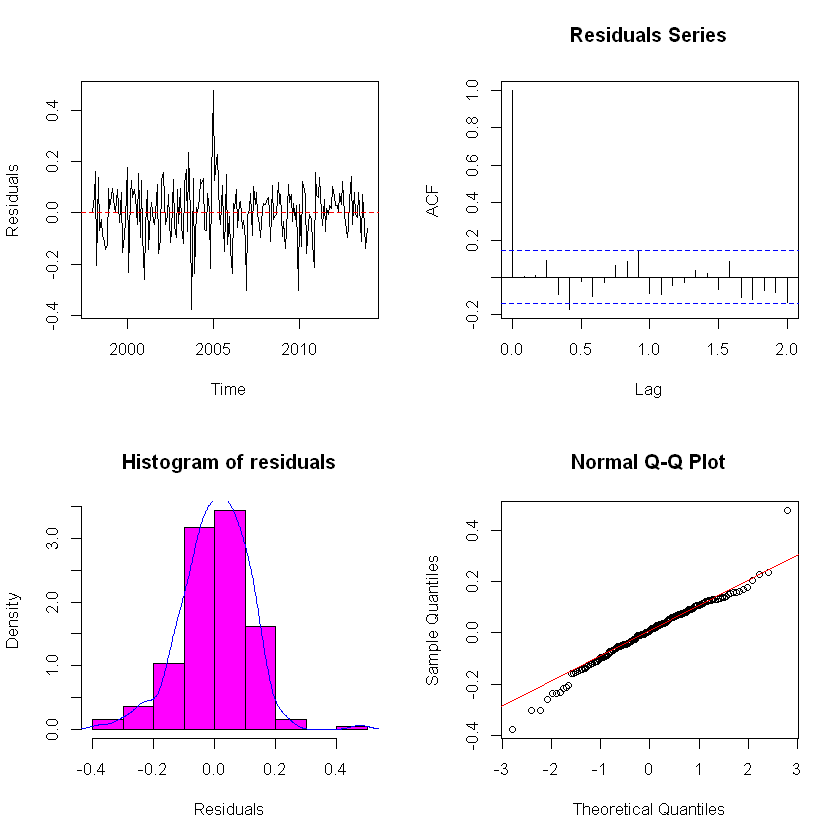

In [52]:
check_model_residuals(suicide_series_best_arima)

*The ACF of the residuals shows non-significant autocorrelations.*
*Also, all the values of p for the Ljung-Box Q test are above 0.05, which indicates that the data is not dependent.*

*The values are normal since they rest on a line and aren't everywhere.*

As the graphs support the assumption that there is no pattern in the residuals, we can go ahead and calculate the forecast.

#### 4.2.2.  Forecasting

The following is the plot of the next two years forectasts (blue line). The shadowed blue is the 80% of confidence and the shadowed grey is the 95%.

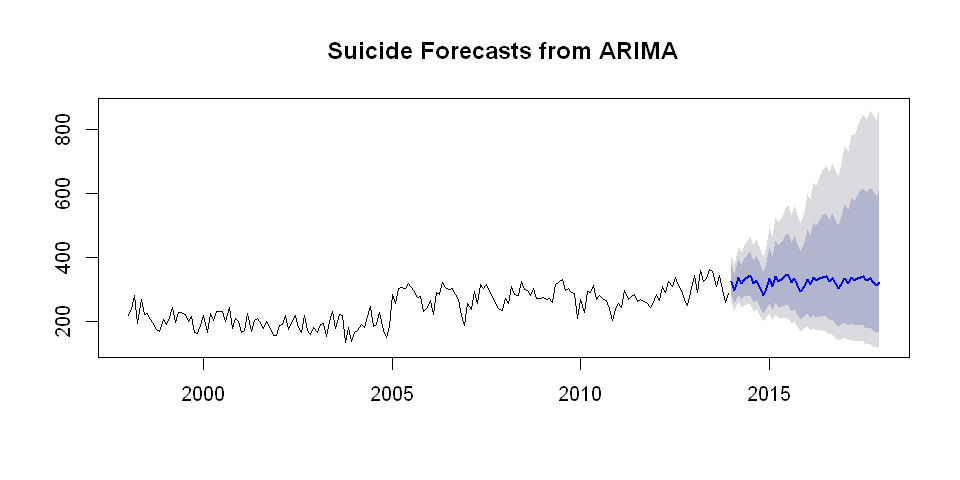

In [53]:
options(repr.plot.width=8, repr.plot.height=4)
suicide_series_best_arima_forecast <- forecast::forecast(suicide_series_best_arima, h = 48)
plot(suicide_series_best_arima_forecast, main= 'Suicide Forecasts from ARIMA')

In [54]:
suicide_series_best_arima_forecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       323.8300 280.7217 373.5581 260.2756 402.9032
Feb 2014       297.5695 255.2313 346.9308 235.3148 376.2943
Mar 2014       336.1978 285.5133 395.8798 261.8531 431.6501
Apr 2014       318.4086 267.8859 378.4599 244.4718 414.7066
May 2014       331.7571 276.6483 397.8436 251.2841 438.0012
Jun 2014       337.8855 279.3832 408.6381 252.6334 451.9063
Jul 2014       343.5955 281.8110 418.9257 253.7376 465.2753
Aug 2014       318.2724 259.0166 391.0842 232.2546 436.1477
Sep 2014       327.7575 264.7419 405.7724 236.4473 454.3294
Oct 2014       302.7411 242.7692 377.5281 215.9926 424.3302
Nov 2014       281.2154 223.9307 353.1545 198.4931 398.4124
Dec 2014       303.8799 240.3365 384.2238 212.2690 435.0282
Jan 2015       332.8319 256.9063 431.1963 223.9996 494.5413
Feb 2015       307.8598 234.9753 403.3515 203.6625 465.3662
Mar 2015       341.3881 257.7699 452.1314 222.1471 524.6337
Apr 2015       325.5080 243.2390 435.602

- Evaluating the forecasts

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.306054,25.29259,19.86062,-0.3617114,8.557237,0.738008,0.02964682,NA
Test set,-17.159646,31.67801,26.50613,-6.4641213,9.138704,0.984951,0.29829645,0.9825845


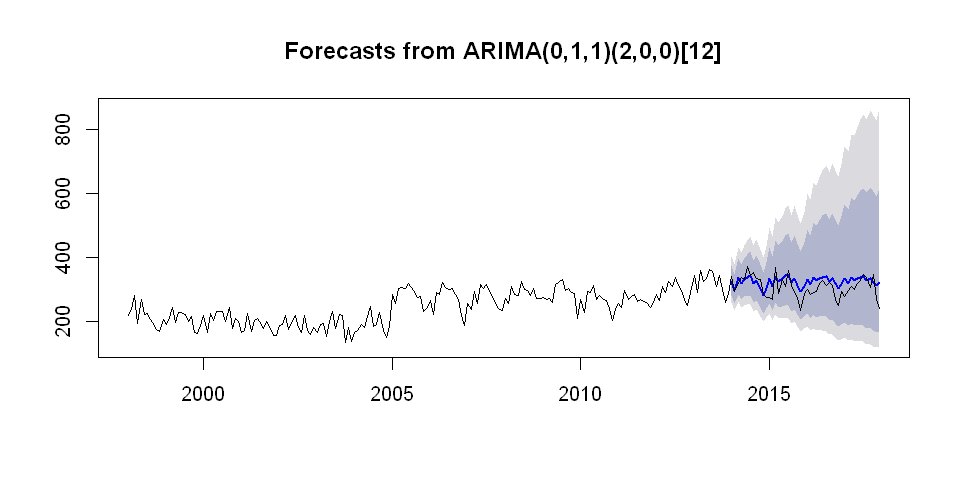

In [55]:
#Accuracy and plot
accuracy(suicide_series_best_arima_forecast, suicide_series_test)
plot(suicide_series_best_arima_forecast)
lines(suicide_1998_2017)

#### *Comparison of predictive models carried out throughout the project on suicide in Spain.*

In [56]:
accuracy(forecast_decomposed_suicide_series, suicide_series_test)
accuracy(suicide_series_hw_future_forecasts, suicide_series_test)
accuracy(suicide_series_best_arima_forecast, suicide_series_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.024471,19.89423,15.27388,-0.2002356,6.621737,0.5675677,-0.01144965,NA
Test set,-8.864959,24.00003,20.82885,-3.4205697,6.943263,0.7739871,0.05833164,0.7228049


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.022322,23.76371,17.61132,0.0889481,7.552774,0.6544255,0.01031651,NA
Test set,-11.942568,26.37736,22.57345,-4.4423405,7.551316,0.8388151,0.09975748,0.7933364


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.306054,25.29259,19.86062,-0.3617114,8.557237,0.738008,0.02964682,NA
Test set,-17.159646,31.67801,26.50613,-6.4641213,9.138704,0.984951,0.29829645,0.9825845


The most accuracy and generalizable model is the ARIMA calculated at the begining with the stl decomposition. There doesn't seem to be overfitting (ARIMA models deal with it). Their residuals behave better than in the other models and if we look at the MASE and MAPE metrics is not a bad model and will work better than a naive one.

We face a stochastic process and the characteristics of the object of study require much more information for more accurate predictions.

Suicide is a complex social fact and this small analysis just wanted to get a little closer to this problem that needs much more dedication.

# Analysis of Unemployment Series

## 1. Reading the Data

In [57]:
wkdir_and_path_unemployment <- cbind(working_directory,'Data/Monthly_unemployment_Spain_1998-2017.csv') # change slash
unemployment_filepath <- str_c(wkdir_and_path_unemployment, collapse = "/") # change slash
unemployment_1998_2017 <- read.csv(unemployment_filepath)
unemployment_1998_2017

Date,N_of_unemployed
<fct>,<dbl>
1998-01-31,2577189
1998-02-28,2553346
1998-03-31,2524004
1998-04-30,2442803
1998-05-31,2369889
1998-06-30,2332016
1998-07-31,2250015
1998-08-31,2235296
1998-09-30,2256328


Seems that our date index is not very useful in R code. It automatically converts our list of values into a time series if you give it start date and frequency.

## 2. Creating and exploring the Time Series

In [58]:
unemployment_1998_2017 <- ts (unemployment_1998_2017$N_of_unemployed, frequency = 12, start = c(1998,1))
class(unemployment_1998_2017)

[1] "ts"

In [59]:
#Here we have the start of our time series
start(unemployment_1998_2017)

[1] 1998    1

In [60]:
#And the end
end(unemployment_1998_2017)

[1] 2017   12

In [61]:
#The cycle of this time series is 12 months in a year
frequency(unemployment_1998_2017)

[1] 12

In [62]:
cycle(unemployment_1998_2017)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1998,1,2,3,4,5,6,7,8,9,10,11,12
1999,1,2,3,4,5,6,7,8,9,10,11,12
2000,1,2,3,4,5,6,7,8,9,10,11,12
2001,1,2,3,4,5,6,7,8,9,10,11,12
2002,1,2,3,4,5,6,7,8,9,10,11,12
2003,1,2,3,4,5,6,7,8,9,10,11,12
2004,1,2,3,4,5,6,7,8,9,10,11,12
2005,1,2,3,4,5,6,7,8,9,10,11,12
2006,1,2,3,4,5,6,7,8,9,10,11,12
2007,1,2,3,4,5,6,7,8,9,10,11,12


In [63]:
#Here we have some descriptive statistics
summary(unemployment_1998_2017)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
1835738 2050295 2361732 3049950 4112796 5040222 

The first basic plot that we are going to use is a line graph with the values of the series in the ordinate and the temporal instants on the abscissa axis. Constructing this graph can be very useful to observe some characteristics of our time series.

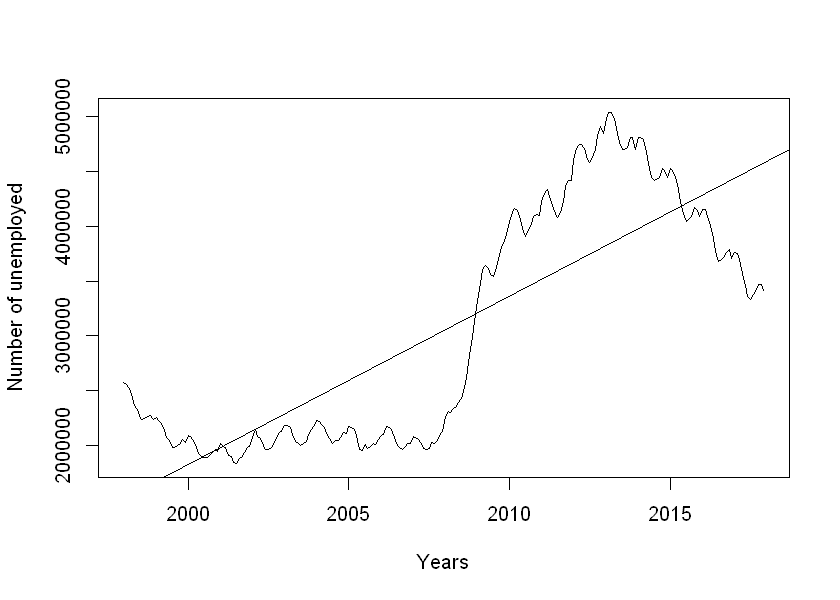

In [64]:
options(repr.plot.width=7, repr.plot.height=5)
#The number of unemployed in Spain
plot(unemployment_1998_2017, xlab = 'Years', ylab = 'Number of unemployed')

#this will fit in a line
abline(reg=lm(unemployment_1998_2017~time(unemployment_1998_2017)))

It seems that the mean, the variance and the covariance are not constant over time. This makes us think that we are facing a **non-stationary series**, although this is something that we will analyze in more detail later.

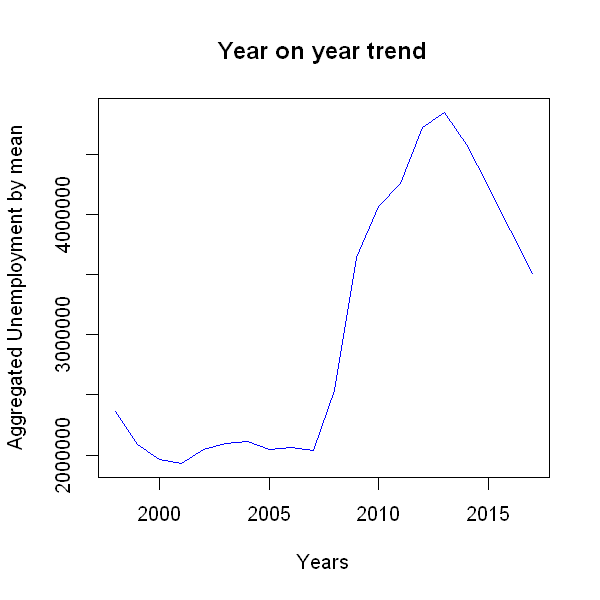

In [65]:
#In this plot we are going to aggregate the cycles and display a year on year trend
options(repr.plot.width=5, repr.plot.height=5)
plot(aggregate(unemployment_1998_2017,FUN=mean), xlab = "Years", ylab = "Aggregated Unemployment by mean", main = 'Year on year trend', col = 'blue')

In [66]:
aggregate(unemployment_1998_2017,FUN=mean)

A Time Series:
 [1] 2359359 2085221 1963462 1930157 2049607 2096887 2113718 2046205 2063062
[10] 2039004 2539941 3644041 4060756 4257160 4720404 4845302 4575937 4232132
[19] 3868898 3507743

The year on year trend clearly shows that the **number of unemployed in Spain increased from 2007 to 2013 and decreased from 2013 to 2017 significantly.**

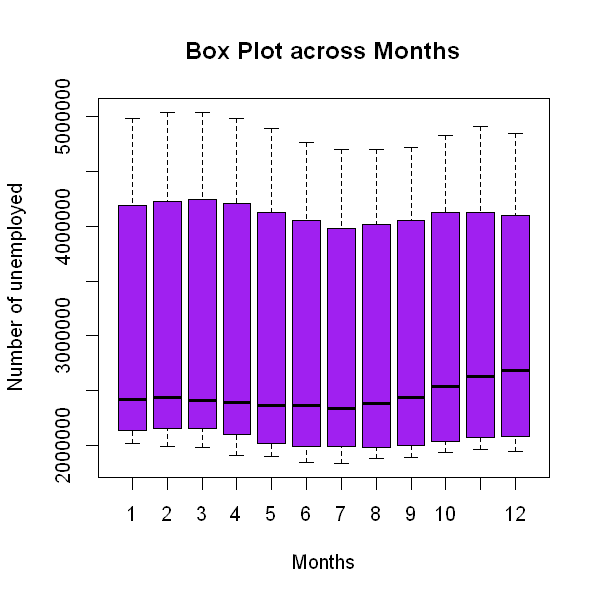

In [67]:
#Box plot across months will give us a sense on seasonal effect
options(repr.plot.width=5, repr.plot.height=5)
boxplot(unemployment_1998_2017~cycle(unemployment_1998_2017), xlab = 'Months', ylab = 'Number of unemployed', main = 'Box Plot across Months',col = 'purple')

The mean value of unemployed in **the last months of the year is higher than rest of the months.** 
Also it shows a great variance due to the large peaks that make our distribution not behave in a very normal way.

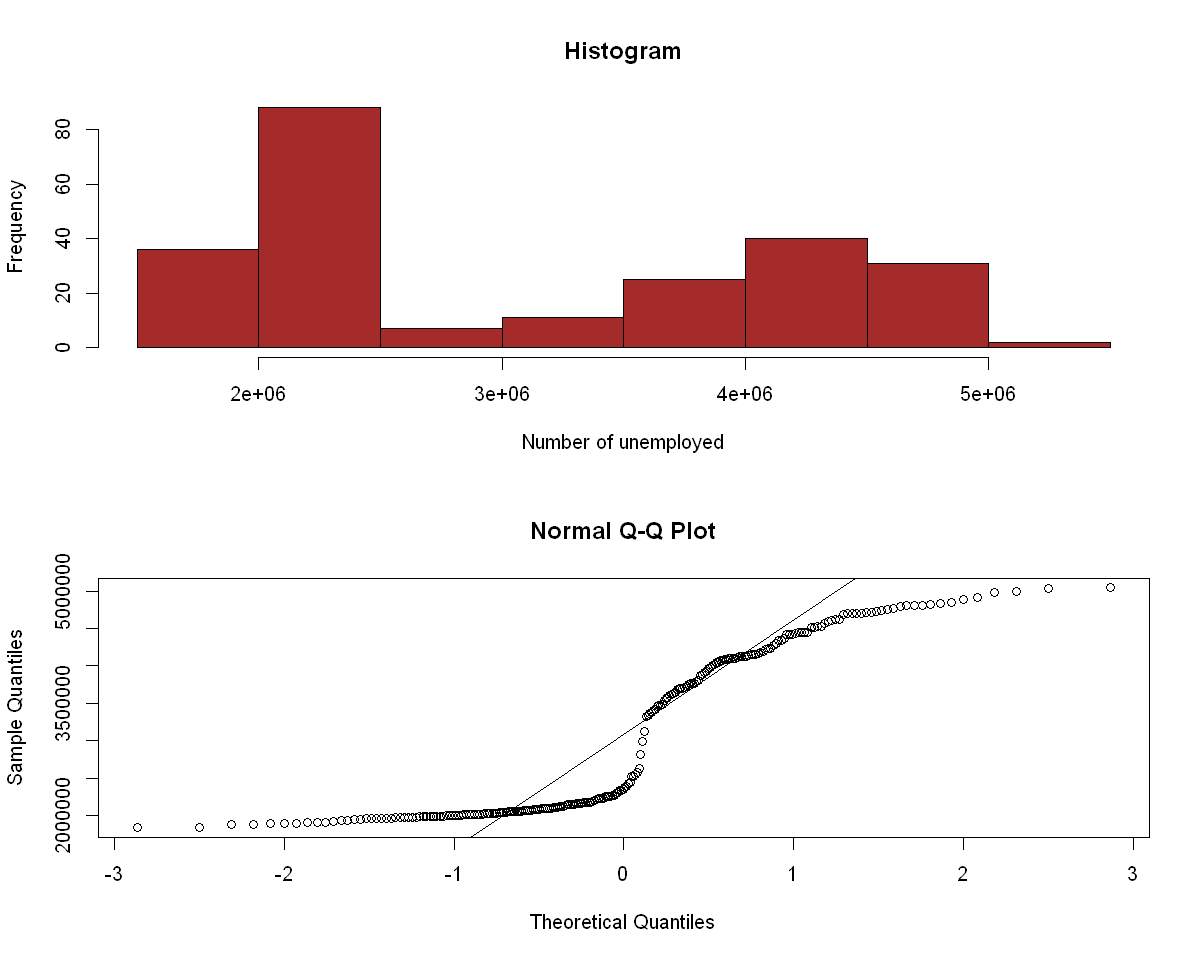

In [68]:
date = make_date(year = 1998, month = 1)
Date_range = seq(from = date, by = 'month', length.out = length(unemployment_1998_2017))

options(repr.plot.width=10, repr.plot.height=8)

par(mfrow=c(2,1)) 

#histogram
hist (unemployment_1998_2017, xlab = 'Number of unemployed', main = 'Histogram', col = 'brown')

#Q-Q plot
qqnorm(unemployment_1998_2017)
qqline(unemployment_1998_2017)

In [114]:
ks.test(unemployment_1998_2017, "pnorm", 3049949.785875, 3049949.785875)


	One-sample Kolmogorov-Smirnov test

data:  unemployment_1998_2017
D = 0.34527, p-value < 2.2e-16
alternative hypothesis: two-sided


The graphs and the test show us that it seems that our distribution it's NOT close to a Gaussian distribution.

## 3. Time Series Components Analysis

We are going to use the same methodology that we used for the suicide series. *So I will not repair so much in explaining the usefulness of each step*.

*Let's start to analyze each of its components with a little more detail, but first we are going to split our time series in a train and a test sets.*

In [70]:
unemployment_series_test  <- ts(tail(unemployment_1998_2017,48), frequency = 12, start = c(2014,1))
unemployment_series_train  <- ts(head(unemployment_1998_2017, 192), frequency = 12, start = c(1998,1))

### 3.1. Decomposition methods

#### 3.1.1. Moving Averages

We present the methodology of moving averages because it's the first step in the classical decomposition and allows us to observe **the trend** of our time series represented in a smoothed way. It can be a good method to extract information in temporary series where there are no fluctuations due to trend or seasonality.

It is possible to apply a moving average to a moving average. One reason for doing this is to make an even-order moving average symmetric. It's recommended to use a 2x12 Moving averages to estimate the trend-cycle of monthly data:

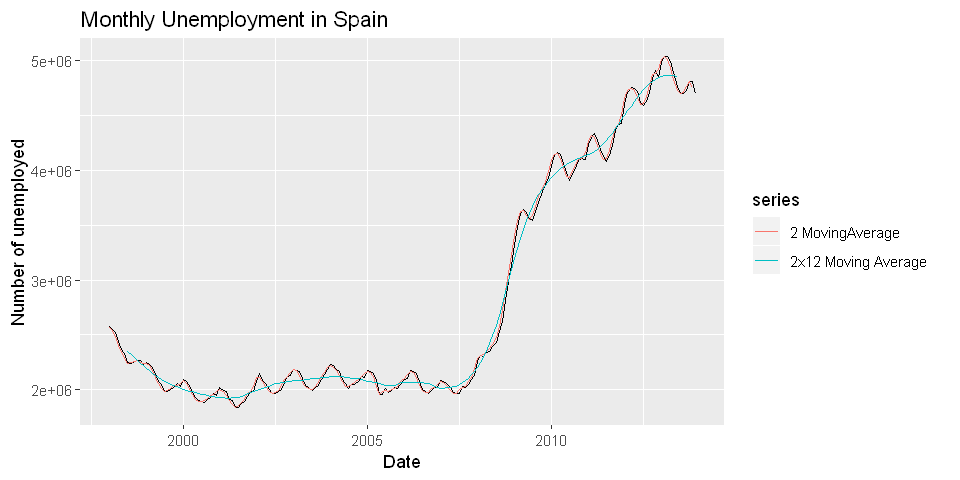

In [71]:
options(repr.plot.width=8, repr.plot.height=4)

#Applying Moving Averages
autoplot(unemployment_series_train) +
    autolayer(ma(unemployment_series_train, order=2, centre=FALSE), series='2 MovingAverage')+
    autolayer(ma(unemployment_series_train,12, centre = TRUE), series='2x12 Moving Average') +
    xlab('Date') + ylab('Number of unemployed') +
    ggtitle('Monthly Unemployment in Spain') +
    guides(colour=guide_legend(title='series'))

The moving average helps us to reduce the noise or short-term volatility in the movements of the data and in this way allows us to better evaluate the quality and direction of a trend.

Let's start with decomposition and seasonal adjustments

#### 3.1.2. Classic Decomposition

We are going to use decompose function to see the components of our time series in a classic decomposition method, jut to have a first look:

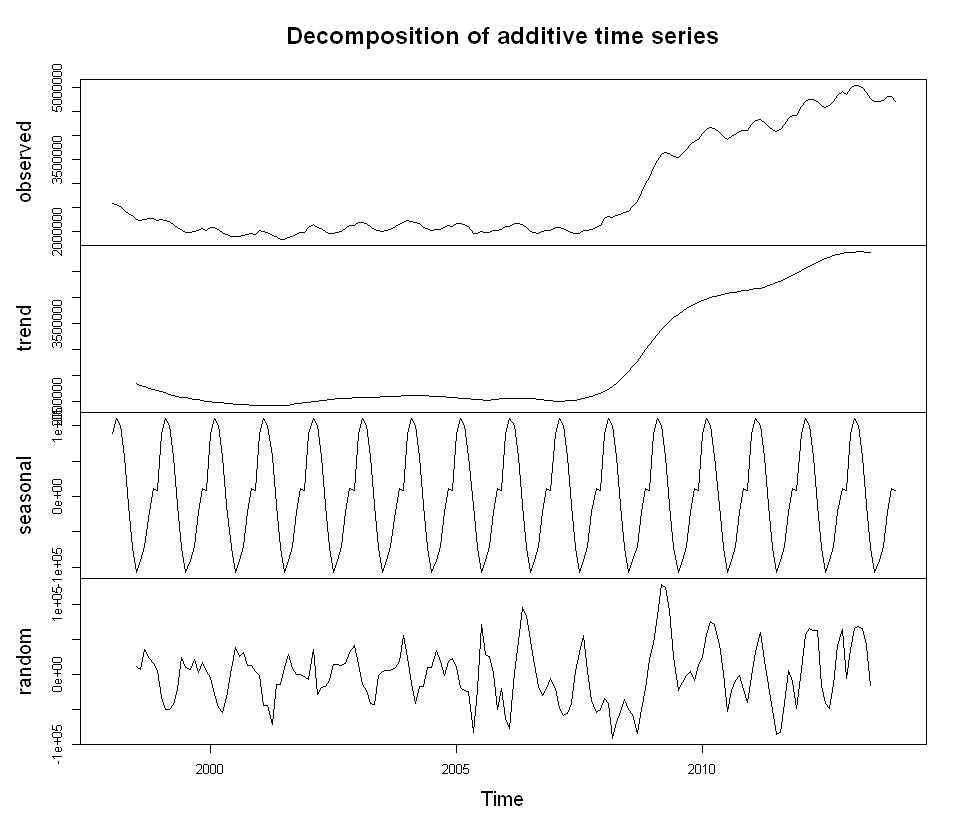

In [72]:
options(repr.plot.width=8, repr.plot.height=7)

unemployment_series_components  <- decompose(unemployment_series_train)
plot(unemployment_series_components)

The plot above shows the original time series (top), the estimated trend component (second from top), the estimated seasonal component (third from top), and the estimated irregular component (bottom). 

Just like with suicide series, it seems that we have to deal with a trend and a seasonal component. Let's confirm this plotting the autocorrelation function of our time series:

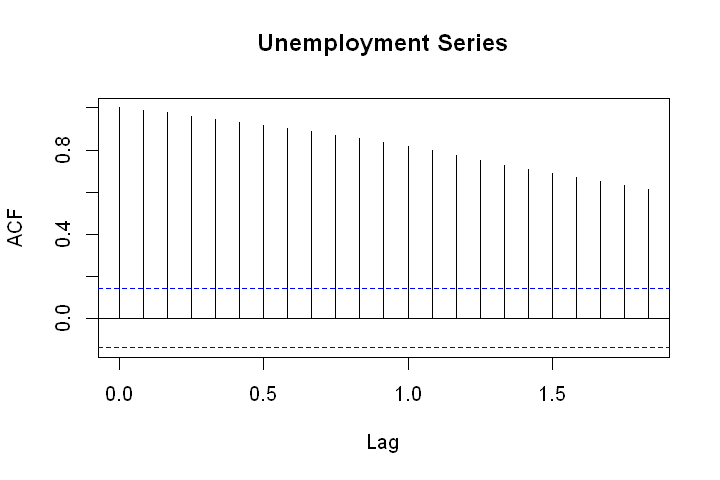

In [73]:
options(repr.plot.width=6, repr.plot.height=4)

acf(unemployment_series_train, main = 'Unemployment Series')

The decrease in the ACF as the lags increase is due to the trend, and it seems that we have a **light seasonal component**. We are not very sure about that so we are going to keep checking.

Classical decomposition methods are good but we want to see the variation of the seasonal component over the time. We are going to use STL method:

#### 3.1.3. STL decomposition

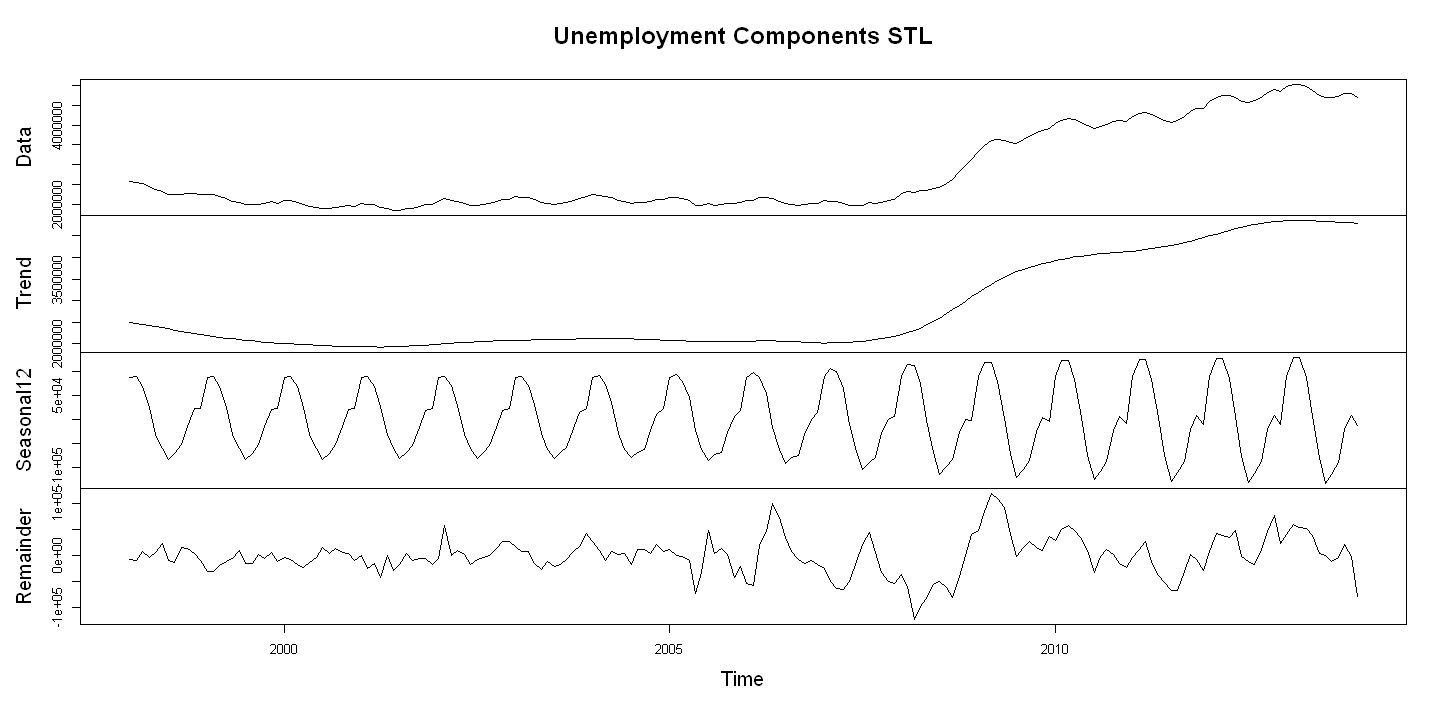

In [74]:
STL_unemployment_components <- mstl(unemployment_series_train)
options(repr.plot.width=12, repr.plot.height=6)
plot(STL_unemployment_components, main = 'Unemployment Components STL')

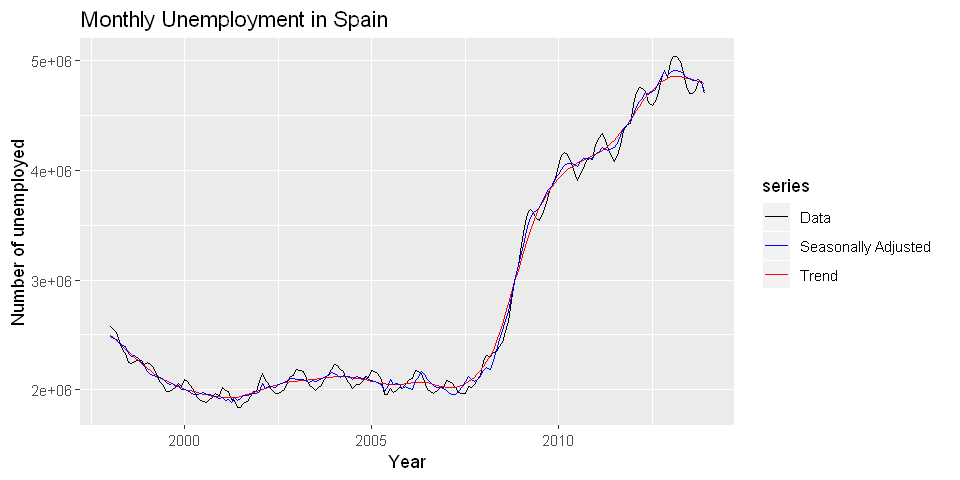

In [75]:
options(repr.plot.width=8, repr.plot.height=4)
autoplot(unemployment_series_train, series="Data") +
    autolayer(trendcycle(STL_unemployment_components), series="Trend") +
    autolayer(seasadj(STL_unemployment_components), series="Seasonally Adjusted") +
    xlab("Year") + ylab("Number of unemployed") +
    ggtitle("Monthly Unemployment in Spain") +
    scale_colour_manual(values=c("black","blue","red"),
             breaks=c("Data","Seasonally Adjusted","Trend"))

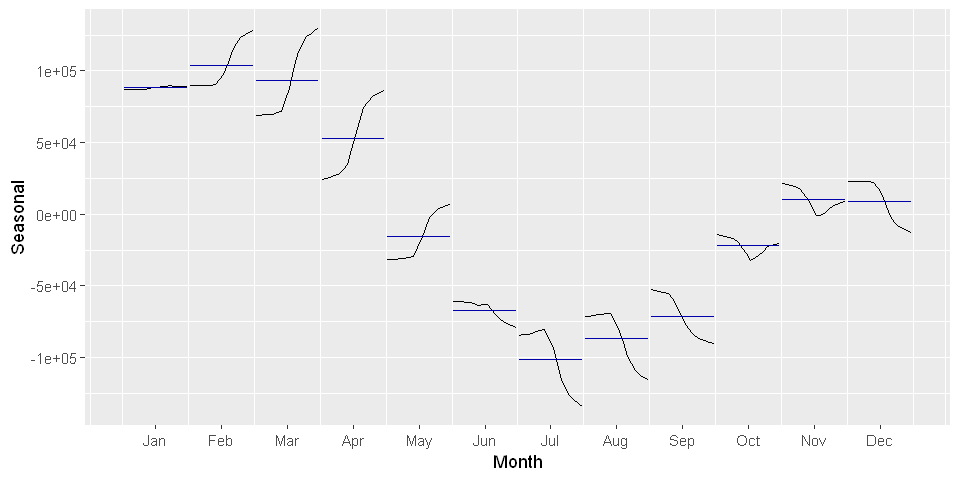

In [76]:
options(repr.plot.width=8, repr.plot.height=4)
STL_unemployment_components %>% seasonal() %>% ggsubseriesplot() + ylab("Seasonal")

Here we can see a more smothed trend. But the most interesting thing that we can observe is that the seasonality component varies with time. 
Over time:
- The values have been growing until May
- The values have been growing since the month of June

The seasonal component might not be relevant to explain the dynamics of the series. In order to see that, we can compare the variance of each component with respect to the variance of the original series.

In [77]:
apply(STL_unemployment_components,2, var) / var(c(unemployment_series_train))

Data       Trend  Seasonal12   Remainder 
1.000000000 0.981464266 0.004566169 0.001168643

*We can see that it is the trend what explains most of the variance in the data.*

In [78]:
seasadj(STL_unemployment_components)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1998,2490026,2463528,2455174,2418851,2401775,2392986,2334447,2306481,2308747,2282057,2248452,2210398
1999,2164528,2143292,2133265,2119607,2108664,2106981,2065019,2051955,2055560,2034681,2034793,2005177
2000,2002751,1989944,1972972,1958364,1960538,1964095,1976320,1959117,1961652,1949347,1942461,1924389
2001,1930186,1903639,1911459,1883664,1929460,1903871,1918625,1948723,1943750,1957113,1966756,1965938
2002,1987735,2060303,2013251,2032031,2033698,2024506,2043969,2053660,2062384,2081691,2099250,2104259
2003,2097820,2090195,2092722,2073003,2065508,2082953,2077038,2085592,2098667,2116582,2128705,2158190
2004,2144718,2128515,2109608,2127433,2119847,2118061,2094782,2118554,2113973,2099766,2111358,2090875
2005,2088473,2071174,2065038,2051008,1982904,2018097,2093740,2048801,2058429,2046758,2008397,2034649
2006,2007454,2005466,2084033,2114602,2165948,2138323,2097131,2063256,2041481,2025071,2024155,2009445
2007,1993435,1969175,1958780,1958317,1983146,2032143,2074563,2118001,2097359,2079275,2095113,2124072


Seasadj function returns seasonally adjusted data constructed by removing the seasonal component. The seasonally adjusted time series now just contains the trend and the irregular component.

##### *Forecasting with Decomposition*

While decomposition is primarily useful for studying time series data, and exploring historical changes over time, it can also be used in forecasting.

We will use stlf function which decompose the time series using STL, forecast the seasonally adjusted series with arima, and return the reseasonalised forecasts.

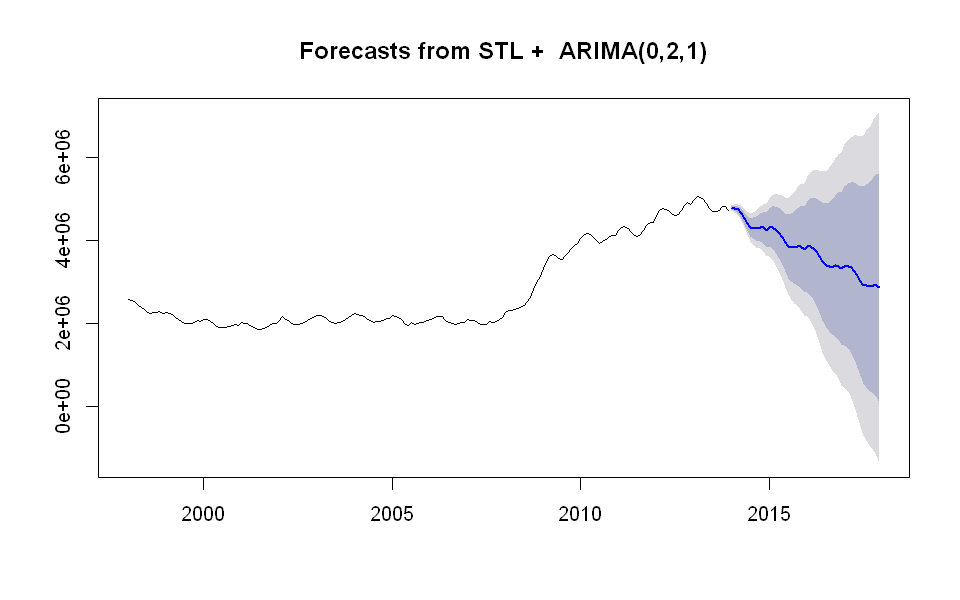

In [79]:
options(repr.plot.width=8, repr.plot.height=5)

forecast_decomposed_unemployment_series <- stlf(unemployment_series_train, method='arima', h = 48)
plot(forecast_decomposed_unemployment_series)


	Box-Ljung test

data:  model_residuals
X-squared = 21.966, df = 24, p-value = 0.5813



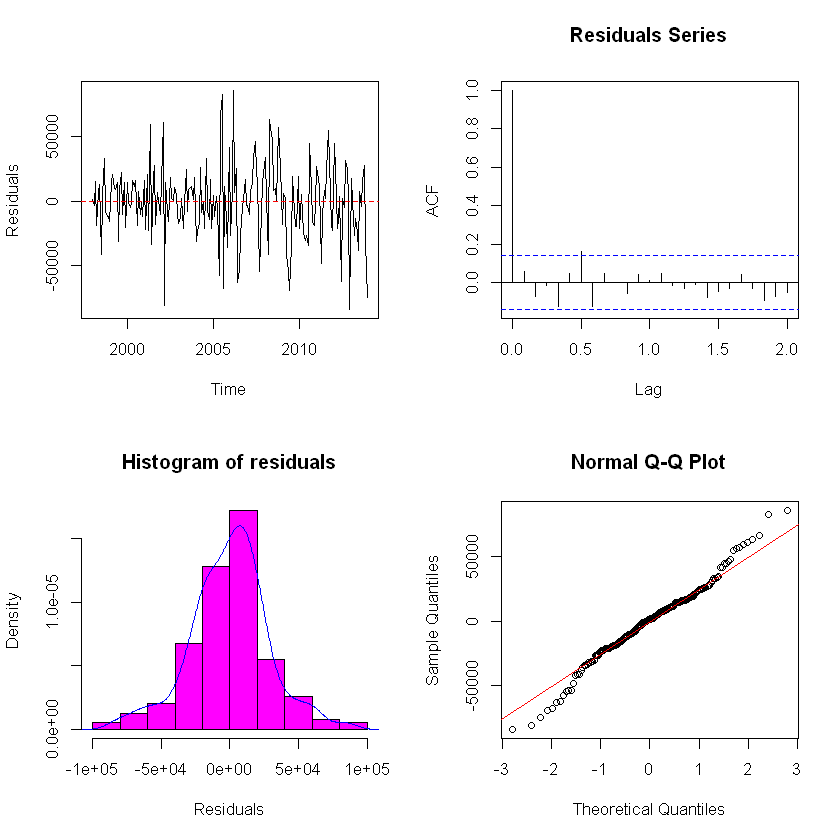

In [80]:
check_model_residuals(forecast_decomposed_unemployment_series)

The residuals behave like a white noise, which is good signal and tells us that it is a generalizable model

- Evaluating the forecasts

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-227.8724,28649.17,21616.26,0.03068031,0.8484542,0.08774597,0.05970994,NA
Test set,279023.7516,311481.62,279023.75,7.30119508,7.3011951,1.13262926,0.90518944,4.869687


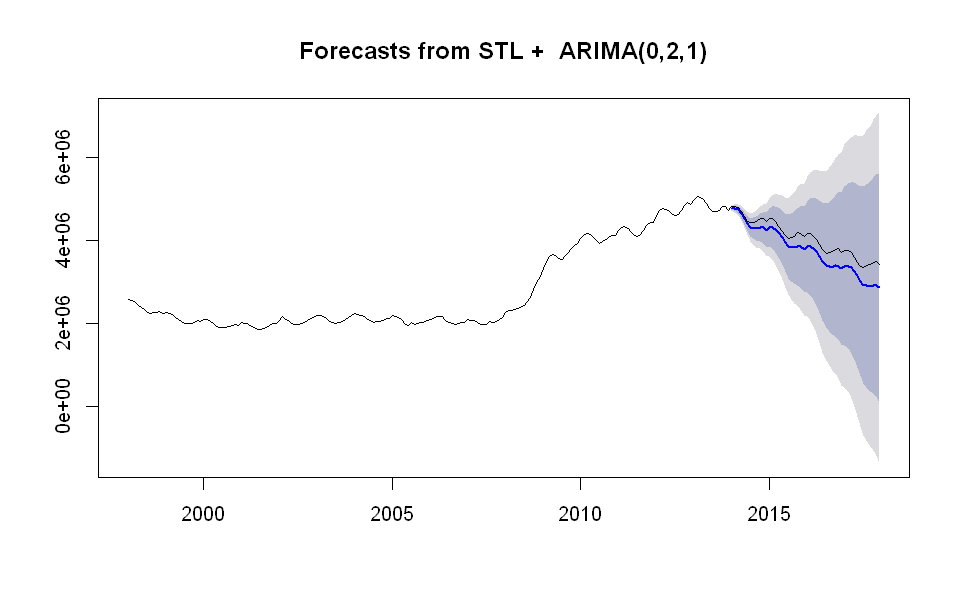

In [81]:
options(repr.plot.width=8, repr.plot.height=5)

#Accuracy and plot
accuracy(forecast_decomposed_unemployment_series, unemployment_series_test)
plot(forecast_decomposed_unemployment_series)
lines(unemployment_1998_2017)

##### Forecasting with Holt-Winters Exponential Smoothing

We are not sure if our series behave in a multiplicative way so we will use its logarithmic transformation to convert it into an additive and that can be used in this model.

In [82]:
unemployment_series_log <-  log(unemployment_series_train)

In [83]:
unemployment_series_hw_forecasts  <- HoltWinters(unemployment_series_log)
unemployment_series_hw_forecasts

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = unemployment_series_log)

Smoothing parameters:
 alpha: 0.9795982
 beta : 0.2311625
 gamma: 1

Coefficients:
            [,1]
a   15.352251289
b   -0.008192338
s1   0.030158174
s2   0.030799705
s3   0.025307352
s4   0.009031449
s5  -0.014700555
s6  -0.024099957
s7  -0.036917214
s8  -0.032895028
s9  -0.017016093
s10  0.003721677
s11  0.015706048
s12  0.011106418

The estimated values of alpha, beta and gamma are 0.97, 0.25 and 1, respectively. The value of alpha (0.97)
is high, indicating that the estimate of the level at the current time point is based upon both recent
observations and some observations in the more distant past. The value of beta is 0.25, indicating that the estimate
of the slope b of the trend component remains roughly the same. The value of gamma (1) is very high, indicating that the seasonal change to much over time.


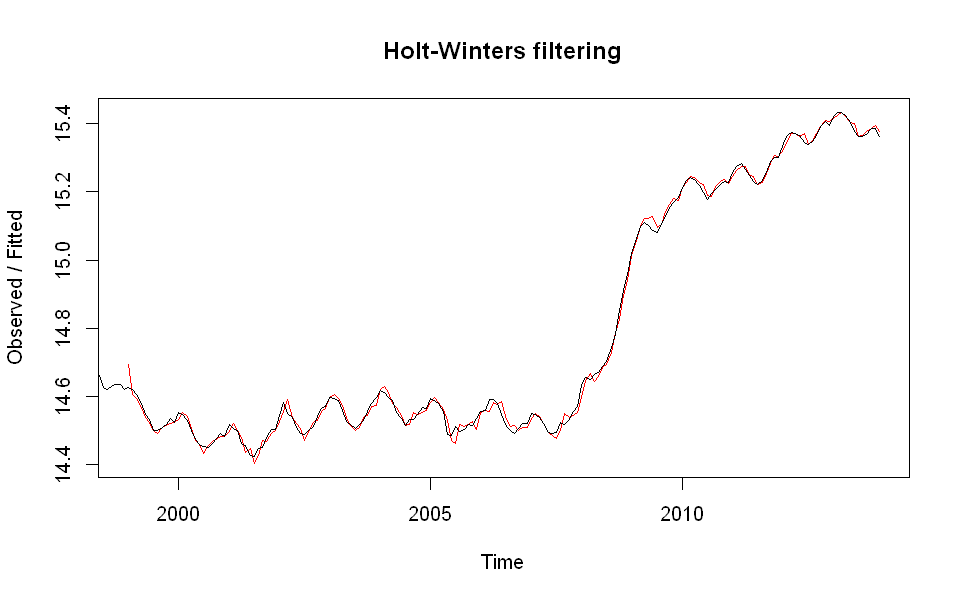

In [84]:
options(repr.plot.width=8, repr.plot.height=5)

plot(unemployment_series_hw_forecasts)

The observed values are plotted with the black line and the fitted values with the red one.

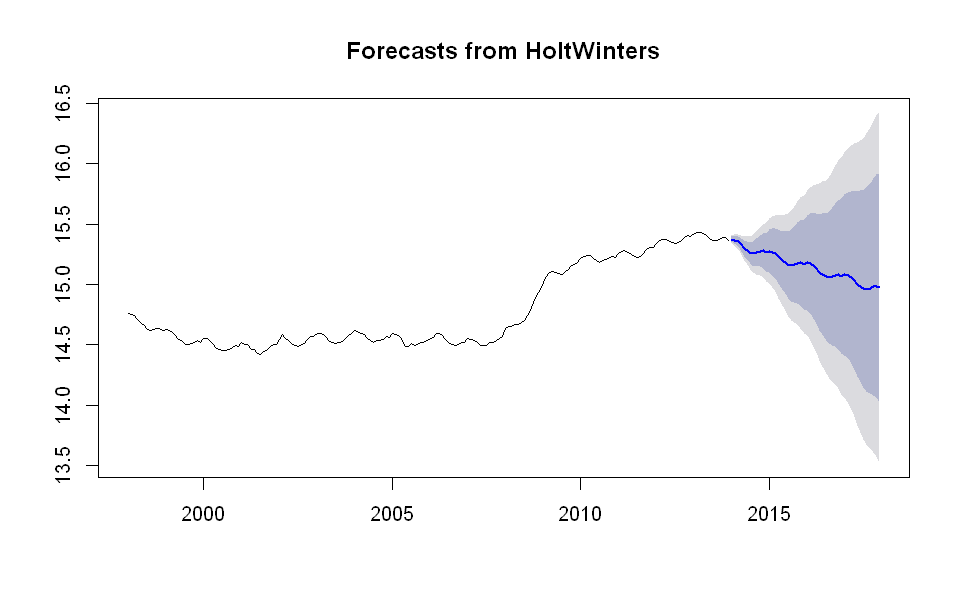

In [85]:
options(repr.plot.width=8, repr.plot.height=5)

unemployment_series_hw_future_forecasts <- forecast::forecast(unemployment_series_hw_forecasts, h = 48)
plot(unemployment_series_hw_future_forecasts)

*The forecasts are shown as a blue line, and the blue and grey shaded areas show 80% and 95% prediction
intervals, respectively.*

Now we are going to check the residuals


	Box-Ljung test

data:  model_residuals
X-squared = 37.005, df = 24, p-value = 0.04371



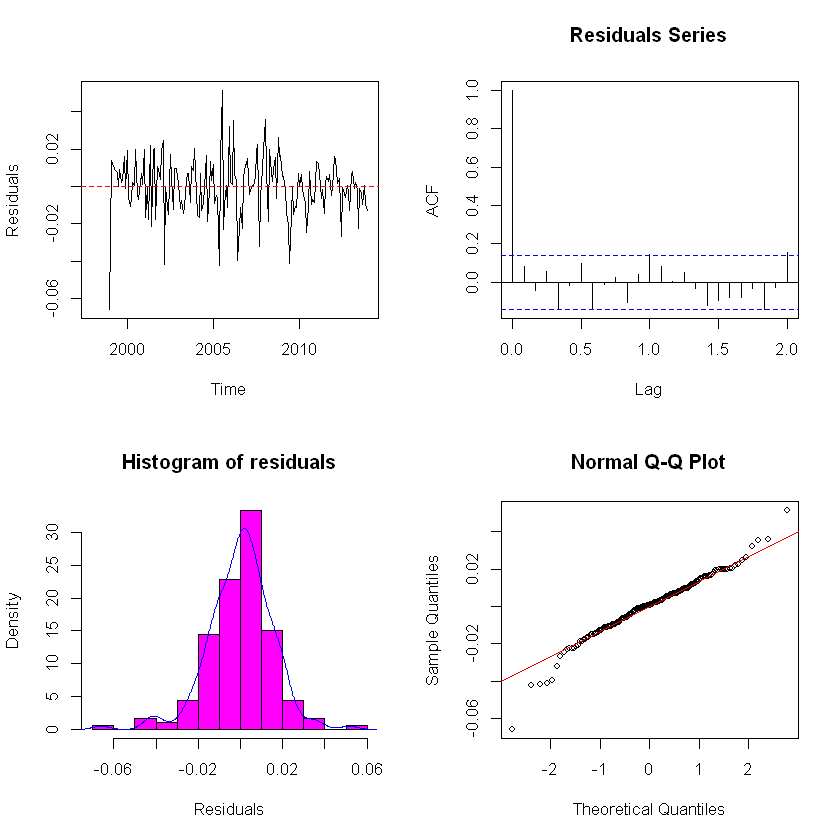

In [86]:
check_model_residuals(unemployment_series_hw_future_forecasts)

The p-value of Ljung-Box test shows that we can reject the null hypothesis. So we can assume that our values are showing dependence on each other with 95% of confidence.

Therefore, there is evidence of autocorrelation for forecast errors, although forecast errors appear to be normally distributed with zero mean and constant variance over time. This suggests that the exponential adjustment of Holt-Winters does not provide an adequate predictive model. In addition, the assumptions on which the prediction intervals were based they probably aren't valid.

If we want to apply other models like Arima we have to have in mind that most of the time series models work on the assumption that the time series is stationary.  Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

### 3.2. Stationarity Testing

To test these conditions of the Unemployment series we will use the same methods that we used in the Suicide time series section.

#### 3.2.1. Moving statistics

We can plot the moving average and see if it varies with time, this is a smoothing method. By moving average We mean that at any instant ‘t’, we’ll take the average of the last year (in our case). We are going to plot it against the original time series and take a look at it.

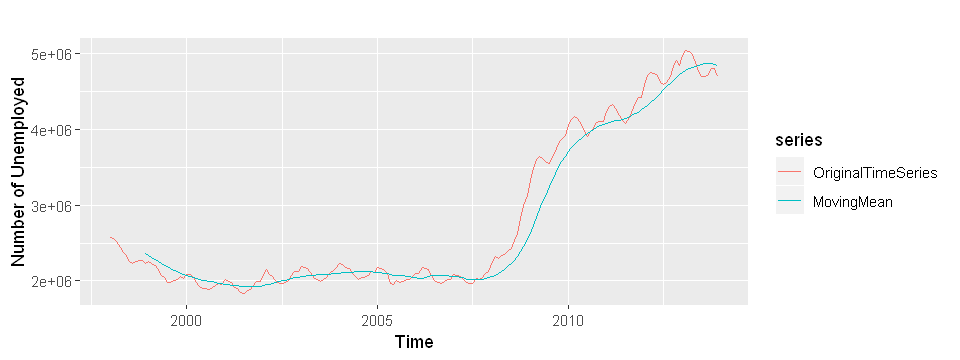

In [87]:
options(repr.plot.width=8, repr.plot.height=5)

moving_mean_vs_OG(unemployment_series_train, 'Number of Unemployed')

The mean is clearly non constant over time. It seems that the series is **non stationary** but we are going to keep checking.

#### 3.2.2. Summary Statistics

As we did with the Suicide time series we are going to split Unemployment time series into two partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [88]:
Stationarity_descriptive_test (unemployment_series_train)

[1] "Mean of the first partition = 2080576.97510417"
[1] "Mean of the second partition = 3506071.17525773"
[1] "Variance of the first partition = 21437848610.8782"
[1] "Variance of the second partition = 1207209979241.38"


Running the code above, we can see the mean and variance look very different over time. It seems that we have a **non-stationary** time series.

#### 3.2.3. Statistical Tests

In [89]:
Stationarity_statistical_tests(unemployment_series_train)


	Augmented Dickey-Fuller Test

data:  timeseries
Dickey-Fuller = -1.898, Lag order = 5, p-value = 0.6188
alternative hypothesis: stationary


	KPSS Test for Level Stationarity

data:  timeseries
KPSS Level = 2.9608, Truncation lag parameter = 4, p-value = 0.01



According to the test our Unemployment time series it's clearly **non stationary**.

## 4. Forecasting with ARIMA

### 4.1.  Conversion to Stationary

#### 4.1.1  Smoothing

We are going to keep working with the Box Cox transformed series.

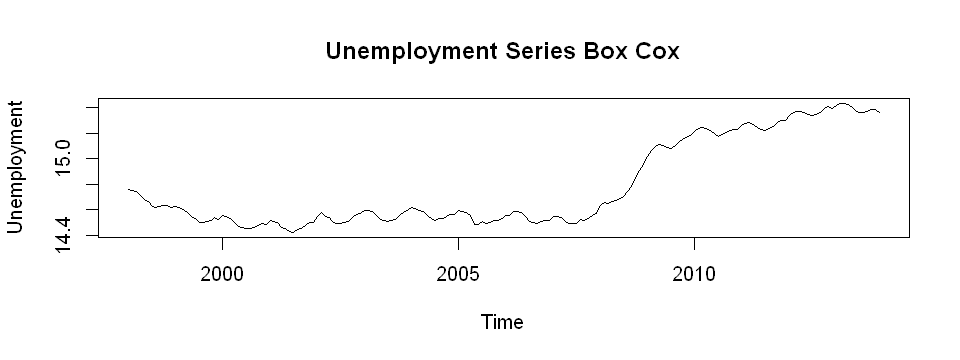

In [90]:
options(repr.plot.width=8, repr.plot.height=3)

unemployment_series_BoxCox  <- forecast::BoxCox(unemployment_series_train, lambda = 0)
plot(unemployment_series_BoxCox, ylab = 'Unemployment', main = 'Unemployment Series Box Cox')

#### 4.1.2. Differencing
Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

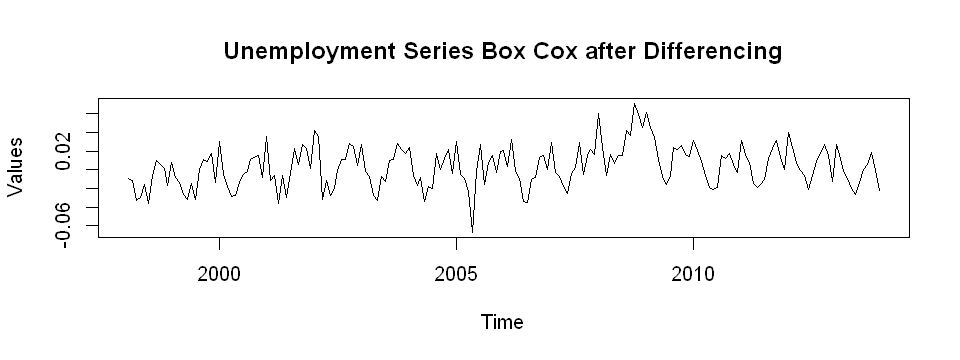

In [91]:
options(repr.plot.width=8, repr.plot.height=3)

unemployment_series_diff_BoxCox <- diff(unemployment_series_BoxCox)
plot(unemployment_series_diff_BoxCox, ylab = 'Values', main = 'Unemployment Series Box Cox after Differencing')

Now we are going to test the resulting series **after the transformation.**
We are going to use the sationarity tests that we did before.

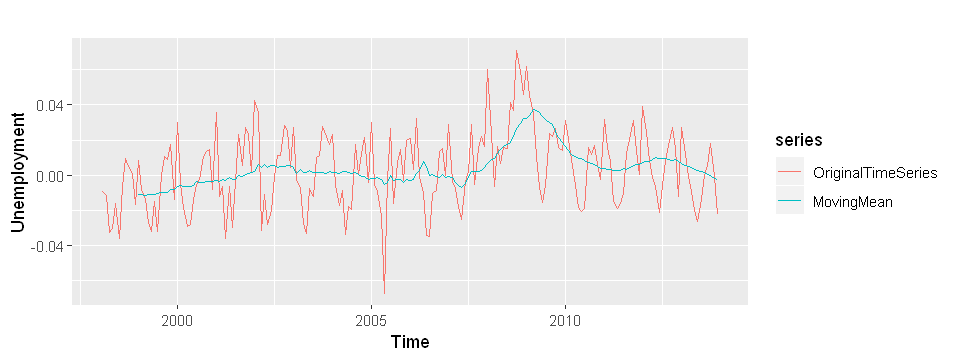

In [92]:
options(repr.plot.width=8, repr.plot.height=3)

#Visual test with moving mean
moving_mean_vs_OG(unemployment_series_diff_BoxCox, 'Unemployment')

The mean doesn't keep constant over time. But it's pretty much stabilized than the original. 

In [93]:
#Numerical test contrasting mean and variance at different time points
Stationarity_descriptive_test(unemployment_series_diff_BoxCox)

[1] "Mean of the first partition = -0.00239436706493168"
[1] "Mean of the second partition = 0.00906981060674615"
[1] "Variance of the first partition = 0.00042546131285285"
[1] "Variance of the second partition = 0.000456339026645394"


Both mean and variance don't change almost anything over time because of the transformation.

In [94]:
#KPSS and ADF hypothesis tests for stationarity
Stationarity_statistical_tests(unemployment_series_diff_BoxCox)


	Augmented Dickey-Fuller Test

data:  timeseries
Dickey-Fuller = -5.9337, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


	KPSS Test for Level Stationarity

data:  timeseries
KPSS Level = 0.57957, Truncation lag parameter = 4, p-value = 0.02449



Our new time series didn't pass both tests with 1 difference. There might be stationarity for Level. 

In [95]:
kpss.test(unemployment_series_diff_BoxCox, null = 'Trend')


	KPSS Test for Trend Stationarity

data:  unemployment_series_diff_BoxCox
KPSS Trend = 0.12222, Truncation lag parameter = 4, p-value = 0.09404


We need a differencing of second order. We assume that we need seasonal differencing because our series pass the test KPSS for Trend Stationarity.

In [96]:
unemployment_series_diff_BoxCox <- diff(unemployment_series_diff_BoxCox)

We can use 'ndiffs' function to see the number of differences required for our time series to pass all the stationarity statistical tests. 

In [97]:
ndiffs(unemployment_series_diff_BoxCox, test= 'kpss')

[1] 0

In [98]:
ndiffs(unemployment_series_diff_BoxCox, test= 'adf')

[1] 0

In [99]:
ndiffs(unemployment_series_diff_BoxCox, test='pp')

[1] 0

We have converted our data in stationary with differencing of second order

We have converted the data into stationary but we have seen that there is a seasonal component in our time series. We are going to take a look at the seasonal component to see if second order differencing is enough to get rid of it:

In [100]:
STL_unemployment_diff_BoxCox_components <- mstl(unemployment_series_diff_BoxCox)
seasonal(STL_unemployment_diff_BoxCox_components)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1998,,,-1.123246e-02,-1.152378e-02,-5.284197e-03,1.200652e-02,3.091993e-03,1.828167e-02,2.257796e-03,9.420683e-03,-1.127074e-03,-1.711025e-02
1999,2.911234e-02,-2.792236e-02,-1.106694e-02,-1.139117e-02,-5.864069e-03,1.225369e-02,3.384937e-03,1.798038e-02,1.963571e-03,9.771662e-03,-1.212246e-03,-1.667180e-02
2000,2.876121e-02,-2.793899e-02,-1.090167e-02,-1.125900e-02,-6.444540e-03,1.250012e-02,3.676994e-03,1.767813e-02,1.668296e-03,1.012144e-02,-1.298775e-03,-1.623500e-02
2001,2.840813e-02,-2.795806e-02,-1.068876e-02,-1.103266e-02,-7.254357e-03,1.267558e-02,4.410007e-03,1.709729e-02,1.024830e-03,1.082423e-02,-1.428447e-03,-1.558381e-02
2002,2.800738e-02,-2.807489e-02,-1.048018e-02,-1.080909e-02,-8.065371e-03,1.285201e-02,5.146169e-03,1.652217e-02,3.896488e-04,1.153718e-02,-1.546106e-03,-1.491966e-02
2003,2.762055e-02,-2.817837e-02,-1.037035e-02,-9.928579e-03,-1.035184e-02,1.334865e-02,6.978022e-03,1.535359e-02,-1.525913e-03,1.368087e-02,-2.117861e-03,-1.282125e-02
2004,2.582771e-02,-2.793770e-02,-1.027814e-02,-9.064745e-03,-1.265402e-02,1.383279e-02,8.800565e-03,1.418166e-02,-3.438845e-03,1.583451e-02,-2.672377e-03,-1.069885e-02
2005,2.406561e-02,-2.766095e-02,-9.090904e-03,-8.914582e-03,-1.459191e-02,1.365971e-02,7.595392e-03,1.564944e-02,-3.992806e-03,1.608603e-02,-3.478891e-03,-9.035219e-03
2006,2.339390e-02,-2.655861e-02,-7.946485e-03,-8.805578e-03,-1.656930e-02,1.345470e-02,6.365855e-03,1.710359e-02,-4.549662e-03,1.634758e-02,-4.262486e-03,-7.338432e-03
2007,2.276558e-02,-2.540820e-02,-7.702861e-03,-1.002883e-02,-1.525798e-02,1.019614e-02,6.597423e-03,1.845907e-02,-3.360093e-03,1.545864e-02,-5.760935e-03,-8.050552e-03


Second order differencing seems enough to get what we need. The values are close to zero and have clearly changed since the original series seasonal component.

### 4.2. Best ARIMA model

We already have the data that meet the conditions Arima asks us for. With this data we would pass on to calculate the appropriate parameters (p, d, q and P, D, Q) to choose the model that best fits with the values of acf and pcf function applied to our transformed and differenced time series.

However, we have chosen to use the 'auto.arima' function that facilitates our work choosing the best parameters.

The 'auto.arima' function returns the best ARIMA model according to either AIC, AICc or BIC value. The function conducts a search over possible model within the order constraints provided.

#### 4.2.1. Estimating

Throughout the analysis we have arrived at a series of conclusions that we are going to include in the model parameters:

- We know that our original time series is non stationary.
- We know that our original time series has a seasonal component.
- We know that our series works better with a transformation; lambda = 0 will perform a BoxCox transformation.
- We know that our time series needs 2 differences, 1 differencing and 1 seassonal differencing (d=1 and D=1).

In [101]:
#This may take a while!
unemployment_series_best_arima <- auto.arima(unemployment_series_train, 
                                             d = 1, D = 1, trace = TRUE, stationary = FALSE,
                                             seasonal = TRUE, lambda = 0, stepwise = FALSE, approximation = FALSE)


 ARIMA(0,1,0)(0,1,0)[12]                    : -911.7633
 ARIMA(0,1,0)(0,1,1)[12]                    : -962.0931
 ARIMA(0,1,0)(0,1,2)[12]                    : -962.9034
 ARIMA(0,1,0)(1,1,0)[12]                    : -937.4909
 ARIMA(0,1,0)(1,1,1)[12]                    : -962.7798
 ARIMA(0,1,0)(1,1,2)[12]                    : -961.086
 ARIMA(0,1,0)(2,1,0)[12]                    : -952.014
 ARIMA(0,1,0)(2,1,1)[12]                    : -960.7154
 ARIMA(0,1,0)(2,1,2)[12]                    : -959.1459
 ARIMA(0,1,1)(0,1,0)[12]                    : -924.2035
 ARIMA(0,1,1)(0,1,1)[12]                    : -987.5726
 ARIMA(0,1,1)(0,1,2)[12]                    : -986.6058
 ARIMA(0,1,1)(1,1,0)[12]                    : -957.4031
 ARIMA(0,1,1)(1,1,1)[12]                    : -986.6031
 ARIMA(0,1,1)(1,1,2)[12]                    : -985.0821
 ARIMA(0,1,1)(2,1,0)[12]                    : -973.4397
 ARIMA(0,1,1)(2,1,1)[12]                    : -984.4882
 ARIMA(0,1,1)(2,1,2)[12]                    : -98

The arima model that best fits is this: ARIMA(1,1,1)(0,1,1)[12]

To check if it is valid we will observe how its residuals behave as we did in the Holt-Winters model.


	Box-Ljung test

data:  model_residuals
X-squared = 19.822, df = 24, p-value = 0.7068



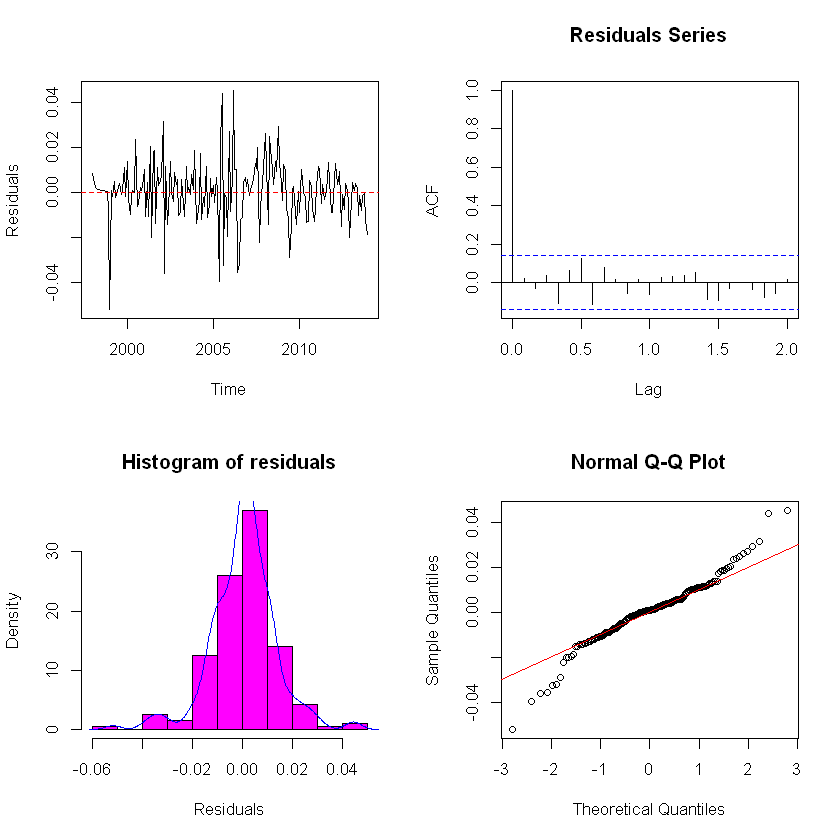

In [102]:
check_model_residuals(unemployment_series_best_arima)

*The ACF of the residuals shows non-significant autocorrelations.*
*Also, all the value of p for the Ljung-Box Q test is above 0.05, which indicates that the data is not dependent.*
Residuals behave like white noise

As the graphs support the assumption that there is no pattern in the residuals, we can go ahead and calculate the forecast.

#### 4.2.2  Forecasting

The following is the plot of the next two years forectasts (blue line). The shadowed blue is the 80% of confidence and the shadowed grey is the 95%.

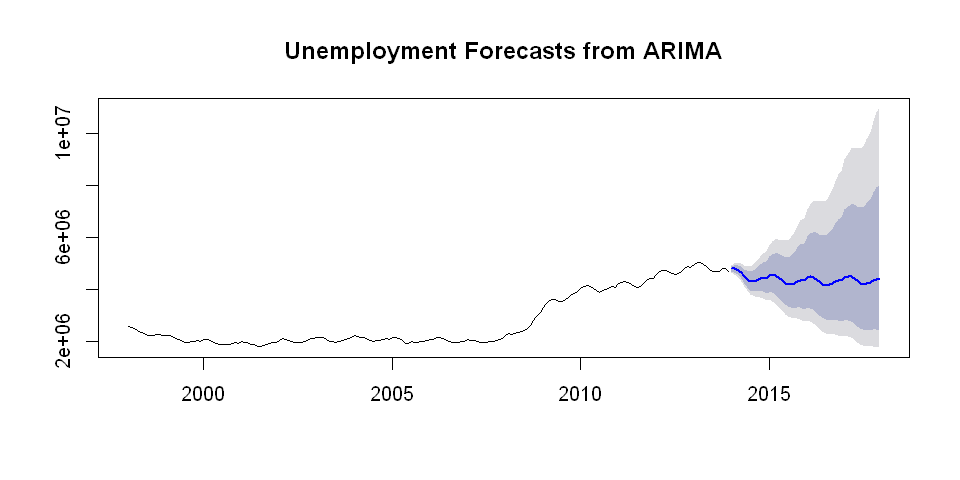

In [103]:
options(repr.plot.width=8, repr.plot.height=4)
unemployment_series_best_arima_forecast <- forecast::forecast(unemployment_series_best_arima, h = 48)
plot(unemployment_series_best_arima_forecast, main= 'Unemployment Forecasts from ARIMA')

In [104]:
unemployment_series_best_arima_forecast

         Point Forecast   Lo 80   Hi 80   Lo 95    Hi 95
Jan 2014        4802443 4719464 4886880 4676120  4932178
Feb 2014        4803752 4671381 4939875 4602791  5013488
Mar 2014        4756483 4578299 4941601 4486693  5042496
Apr 2014        4659385 4438623 4891126 4326025  5018432
May 2014        4523113 4263560 4798468 4132245  4950954
Jun 2014        4407040 4109699 4725893 3960505  4903920
Jul 2014        4327127 3991290 4691222 3824192  4896205
Aug 2014        4335428 3954859 4752618 3767114  4989479
Sep 2014        4350585 3924458 4822982 3716045  5093477
Oct 2014        4420660 3942863 4956356 3711207  5265735
Nov 2014        4455540 3929056 5052573 3676023  5400358
Dec 2014        4428299 3860721 5079318 3590334  5461840
Jan 2015        4544004 3912983 5276787 3615228  5711390
Feb 2015        4564703 3882074 5367365 3563063  5847921
Mar 2015        4538090 3811241 5403558 3474855  5926652
Apr 2015        4462480 3700714 5381050 3351605  5941550
May 2015        4347666 3560141

- Evaluating forecasts

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-76.9938,33391.18,24289.22,0.04500979,0.9205342,0.0985962,0.1385532,NA
Test set,-350842.2602,498918.13,377566.86,-9.68263843,10.2753326,1.5326411,0.9499524,8.06648


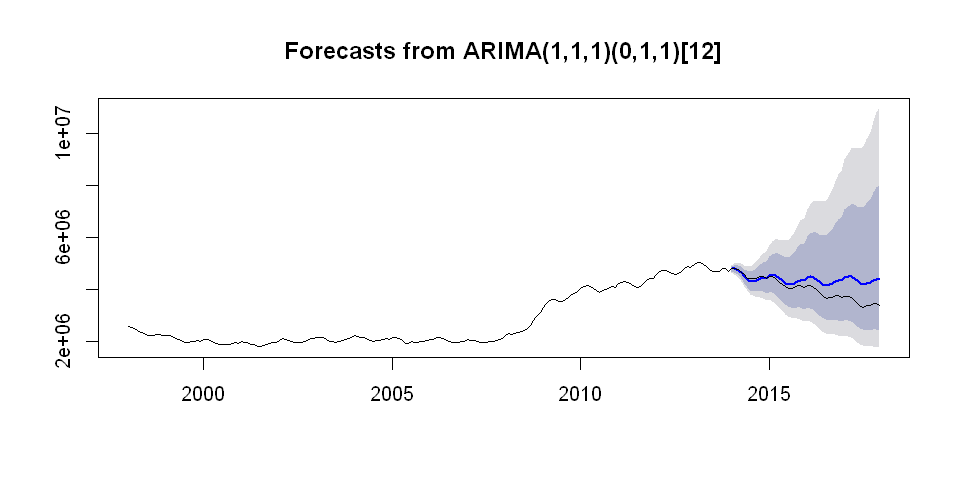

In [105]:
options(repr.plot.width=8, repr.plot.height=4)

#Accuracy and plot
accuracy(unemployment_series_best_arima_forecast, unemployment_series_test)
plot(unemployment_series_best_arima_forecast)
lines(unemployment_1998_2017)

#### *Comparison of predictive models carried out throughout the project on unemployment in Spain.*

In [106]:
accuracy (forecast_decomposed_unemployment_series, unemployment_series_test)
accuracy(unemployment_series_hw_future_forecasts, unemployment_series_test)
accuracy (unemployment_series_best_arima_forecast, unemployment_series_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-227.8724,28649.17,21616.26,0.03068031,0.8484542,0.08774597,0.05970994,NA
Test set,279023.7516,311481.62,279023.75,7.30119508,7.3011951,1.13262926,0.90518944,4.869687


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.499963e-05,1.517327e-02,1.121055e-02,6.377795e-04,0.07617761,1.316201e-01,0.08178933,NA
Test set,4.046162e+06,4.068976e+06,4.046162e+06,9.999962e+01,99.99962153,4.750490e+07,0.93109698,57.03858


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-76.9938,33391.18,24289.22,0.04500979,0.9205342,0.0985962,0.1385532,NA
Test set,-350842.2602,498918.13,377566.86,-9.68263843,10.2753326,1.5326411,0.9499524,8.06648


The last ARIMA offers the best results. However, none of our models are good. As we can see, after 2015 our time series suffers another change of trend that we couldn't predict in our model. We would have to study how to include the cycles in our project and see if we need more data to estimate them.

Like suicide, unemployment is a stochastic process that has undergone many changes in Spain in recent years, difficult to predict with the information we had.

# Relation between Unemployment and Suicide in Spain

In this section, we are going to analyze the statistical relationship of the time series of Suicide and Unemployment in Spain (1998-2017).


For this we are going to use the proposals of Box and Jenkins (1970) for the calculation of the cross-correlation function and the subsequent identification of the potential transfer between two systems (two time series).


In this approach the relationship between two time series is studied; relationship that does not pretend to be explanatory, but informs us about the strength and direction of the possible impact of a series 'input' to another series 'output'.

The point of this methodology and not calculate the cross correlation between the original time series is that when an input series is autocorrelated, the direct cross-correlation function between the input and response series gives a misleading indication of the relation between the input and response series.

Is usually called prewhitening. You first fit an ARIMA model for the input series sufficient to reduce the residuals to white noise; then, filter the input series with this model to get the white noise residual series. You then filter the output series with the same model and cross-correlate the filtered response with the filtered input series.

## 1. Prewhitening Method and Cross Correlation

## 1.1. Input series Arima

The model must be valid and return residuals that behave like a white noise.

In [107]:
#We can take the model that we have calculated in the Unemployment series section
unemployment_series_best_arima

Series: unemployment_series_train 
ARIMA(1,1,1)(0,1,1)[12] 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ma1     sma1
      0.9461  -0.6924  -0.8698
s.e.  0.0367   0.0699   0.0869

sigma^2 estimated as 0.0001843:  log likelihood=517.15
AIC=-1026.29   AICc=-1026.06   BIC=-1013.54


	Box-Ljung test

data:  model_residuals
X-squared = 19.822, df = 24, p-value = 0.7068



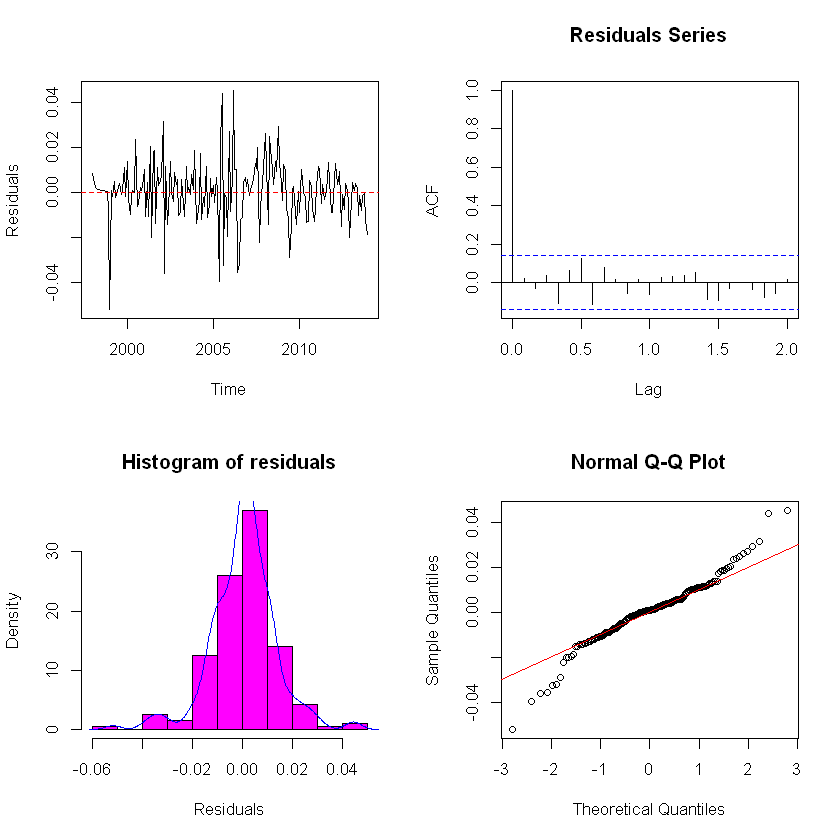

In [108]:
#As we saw before, the residuals of this model pass the Lunj Box test and don't have autocorrelation between them
check_model_residuals(unemployment_series_best_arima)

## 1.2. Filtering the output series
Pre-whiten the output series by applying the model of the input series to the output series. The same parameters must serve to make both models valid.



In [109]:
#Applying the model
prewhitening_filtered_suicide_series <-  arima(suicide_1998_2017,
                                               order = c(1,1,1), 
                                               seasonal = list(order = c(0,1,1), period = 12))


	Box-Ljung test

data:  model_residuals
X-squared = 27.894, df = 24, p-value = 0.2645



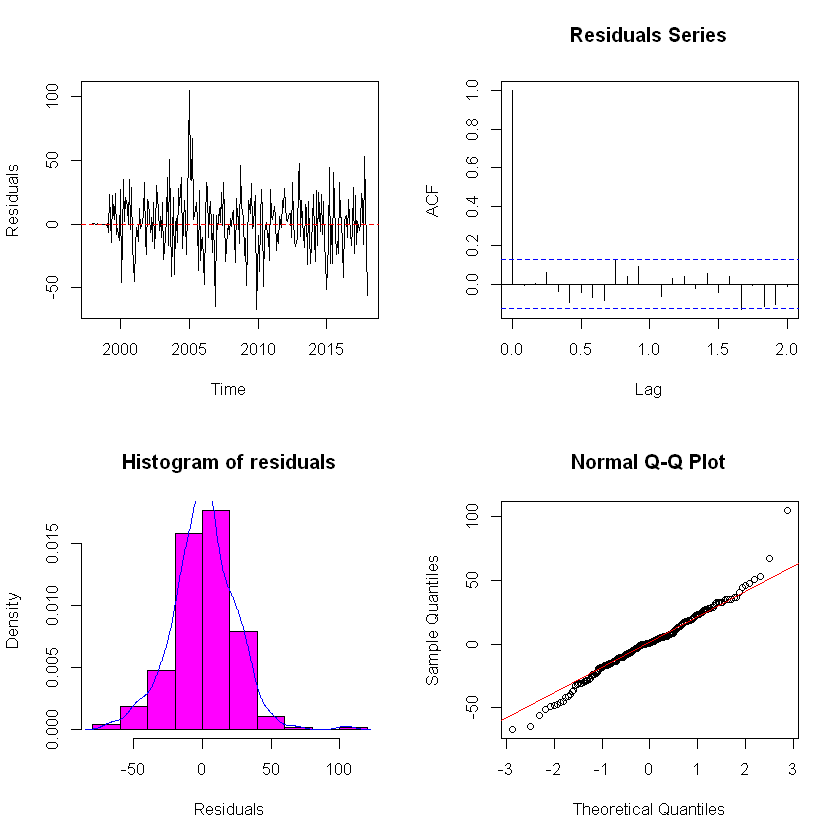

In [110]:
check_model_residuals(prewhitening_filtered_suicide_series)

They behave like white noise, we can go ahead and calculate the cross correlaion function.

## 1.3. Cross Correlation function
Calculate the cross-correlation function between the residuals of both models and diagnose the transfer.

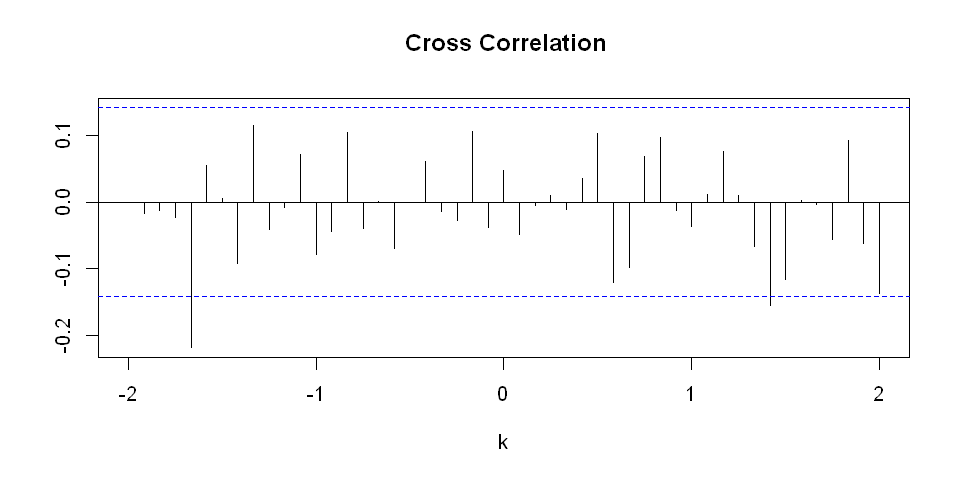

In [111]:
unemployment_series_best_arima_residuals <- residuals(unemployment_series_best_arima)
prewhitening_filtered_suicide_series_residuals <- residuals(prewhitening_filtered_suicide_series)
options(repr.plot.width=8, repr.plot.height=4)

cross_correlation_after_prewhitening  <- ccf(unemployment_series_best_arima_residuals,
                                             prewhitening_filtered_suicide_series_residuals,
                                             lag = 24, xlab = 'k', ylab = '', main = ' Cross Correlation' )

In [112]:
cross_correlation_after_prewhitening


Autocorrelations of series 'X', by lag

-2.0000 -1.9167 -1.8333 -1.7500 -1.6667 -1.5833 -1.5000 -1.4167 -1.3333 -1.2500 
  0.000  -0.017  -0.013  -0.023  -0.219   0.055   0.006  -0.093   0.115  -0.041 
-1.1667 -1.0833 -1.0000 -0.9167 -0.8333 -0.7500 -0.6667 -0.5833 -0.5000 -0.4167 
 -0.008   0.071  -0.079  -0.044   0.104  -0.039   0.002  -0.069   0.000   0.061 
-0.3333 -0.2500 -0.1667 -0.0833  0.0000  0.0833  0.1667  0.2500  0.3333  0.4167 
 -0.015  -0.027   0.106  -0.038   0.047  -0.049  -0.005   0.010  -0.011   0.035 
 0.5000  0.5833  0.6667  0.7500  0.8333  0.9167  1.0000  1.0833  1.1667  1.2500 
  0.103  -0.120  -0.098   0.068   0.097  -0.013  -0.037   0.011   0.075   0.011 
 1.3333  1.4167  1.5000  1.5833  1.6667  1.7500  1.8333  1.9167  2.0000 
 -0.066  -0.156  -0.116   0.003  -0.003  -0.056   0.092  -0.063  -0.137 

#### *Diagnosis*

The cross correlation function measures not only the strength of the relationship, but also its direction. This last property is useful to identify causal variables. 

For this reason, it is important to examine the cross correlation function for both the positive values of k and for the negatives. For negative values of k, the cross correlation function describes the linear influence of the past values of Y(time) over X(time). For positive values of k, the cross correlation function indicates the linear influence of the past values of X(time) on Y(time).

Surprise!
In our case the cross correlation function shows a significant correlation in a negative value of k, so it could be said that there is an impact from one series to another but in the opposite direction to what we thought. Suicide 'would explain', in some aspect, unemployment in Spain.

A priori this does not make much sense, but it does lead us to other conclusions that bring us closer to understanding the phenomenon of suicide in Spain.
- We are right and there is no relationship between unemployment and suicide in Spain
- There is a problem with the data collection or we need a bigger sample
- We haven't found a good fit for the unemployment series and that makes it difficult for us to study the cross-correlation
- There are one or several exogenous variables that explain the behavior of both time series
- Random events explain the trend changes in our time series. We will investigate what could have been
- This methodology does not fit the problem we want to solve

So suicide and unemployment are difficult to forecast and they aren't correlated.

In the next steps we will use the same methodology to find correlations between suicide data and other macro variables (such as GDP) to get a little closer to understanding the high number of suicides in Spain.

## TABLEAU CONNECTION
If we want to perform some interactive graphs in Tableau we have to create a connection between R and Tableau running the code below.
Also if you want to get deeper into the graphs showned in the visual report I have created for this project, you'll have to run the code below. The report and the graphs are in the 'Report_and_Graphs' folder of the repository you have downloaded: https://github.com/tonilopezrosell/understandingsuicide

More details about this in the README.md of this project.

In [113]:
#install.packages("Rserve")
library(Rserve)

Rserve()

Starting Rserve...
 "C:\Users\Toni\DOCUME~1\R\WIN-LI~1\3.5\Rserve\libs\x64\Rserve.exe"  
